In [29]:
#!pip install pandas

In [327]:
# Notebook for inspecting results and explanations

import cv2
import json
import os
import random
import matplotlib.pyplot as plt
import numpy as np
import torch

from PIL import Image
import pandas as pd
import torchvision.transforms as transforms
from captum.attr import visualization

In [394]:
#!pwd
entity_spans_dict = json.load(open("/home/diego/adv_comp_viz21/lxmert/orig_code/lxmert/data/kvqa/new_kvqa_q_caps_ents0502.json"))

In [397]:
#list(entity_spans_dict.keys())[0]
entity_spans_dict['21717']

{'wikiCap_new': 'Francis Condon in the early 20th Century',
 'ents_found': [['Francis Condon', 0, 14]]}

In [240]:
#os.chdir(f'../lxmert_gen/Transformer-MM-Explainability-main/')
from lxmert.lxmert.src.lxrt.tokenization import BertTokenizer

In [ ]:
""" each takes about 70 minutes
##################################################################
# CAPT VERSIONS 
##################################################################
CUDA_VISIBLE_DEVICES=0 PYTHONPATH=`pwd` python lxmert/lxmert/perturbation_kvqa.py --incl_capt  --split_num 0 --test test_kvqa --load /home/diego/adv_comp_viz21/lxmert/orig_code/lxmert/snap/kvqa/kvqa_capt_sp0_0/BEST --pred_out experiments/kvqa_capt_0_newlxmo_0905.json    
CUDA_VISIBLE_DEVICES=1 PYTHONPATH=`pwd` python lxmert/lxmert/perturbation_kvqa.py --incl_capt  --split_num 1 --test test_kvqa --load /home/diego/adv_comp_viz21/lxmert/orig_code/lxmert/snap/kvqa/kvqa_capt_sp1_1/BEST --pred_out experiments/kvqa_capt_1_newlxmo_0905.json
CUDA_VISIBLE_DEVICES=2 PYTHONPATH=`pwd` python lxmert/lxmert/perturbation_kvqa.py --incl_capt  --split_num 2 --test test_kvqa --load /home/diego/adv_comp_viz21/lxmert/orig_code/lxmert/snap/kvqa/kvqa_capt_sp2_2/BEST --pred_out experiments/kvqa_capt_2_newlxmo_0905.json
CUDA_VISIBLE_DEVICES=2 PYTHONPATH=`pwd` python lxmert/lxmert/perturbation_kvqa.py --incl_capt  --split_num 3 --test test_kvqa --load /home/diego/adv_comp_viz21/lxmert/orig_code/lxmert/snap/kvqa/kvqa_capt_sp3_3/BEST --pred_out experiments/kvqa_capt_3_newlxmo_0901.json
CUDA_VISIBLE_DEVICES=0 PYTHONPATH=`pwd` python lxmert/lxmert/perturbation_kvqa.py --incl_capt  --split_num 4 --test test_kvqa --load /home/diego/adv_comp_viz21/lxmert/orig_code/lxmert/snap/kvqa/kvqa_capt_sp4_4/BEST --pred_out experiments/kvqa_capt_4_newlxmo_0905.json
                         tp1%   tp5%   tp1   tp5    all  
    top1/top5 Acc/Raw: [49.84, 67.66, 9318, 12650, 18697]    Save results to  experiments/kvqa_capt_0_newlxmo_0905.json
    top1/top5 Acc/Raw: [50.43, 68.28, 9332, 12636, 18505]    Save results to  experiments/kvqa_capt_1_newlxmo_0905.json
    top1/top5 Acc/Raw: [50.66, 68.06, 9471, 12725, 18696]    Save results to  experiments/kvqa_capt_2_newlxmo_0905.json
    top1/top5 Acc/Raw: [51.05, 68.04, 9827, 13097, 19248]    Save results to  experiments/kvqa_capt_3_newlxmo_0901.json
    top1/top5 Acc/Raw: [49.25, 67.36, 8925, 12205, 18120]    Save results to  experiments/kvqa_capt_4_newlxmo_0905.json
    
##################################################################
# EBERT VERSIONS 
##################################################################
CUDA_VISIBLE_DEVICES=0 PYTHONPATH=`pwd` python lxmert/lxmert/perturbation_kvqa.py --use_lm ebert  --split_num 0 --test test_kvqa --load /home/diego/adv_comp_viz21/lxmert/orig_code/lxmert/snap/kvqa/kvqa_ebert_sp0_0/BEST --pred_out experiments/kvqa_ebert_0_newlxmo_0905.json
CUDA_VISIBLE_DEVICES=1 PYTHONPATH=`pwd` python lxmert/lxmert/perturbation_kvqa.py --use_lm ebert  --split_num 1 --test test_kvqa --load /home/diego/adv_comp_viz21/lxmert/orig_code/lxmert/snap/kvqa/kvqa_ebert_sp1_1/BEST --pred_out experiments/kvqa_ebert_1_newlxmo_0905.json
CUDA_VISIBLE_DEVICES=2 PYTHONPATH=`pwd` python lxmert/lxmert/perturbation_kvqa.py --use_lm ebert  --split_num 2 --test test_kvqa --load /home/diego/adv_comp_viz21/lxmert/orig_code/lxmert/snap/kvqa/kvqa_ebert_sp2_2/BEST --pred_out experiments/kvqa_ebert_2_newlxmo_0905.json
CUDA_VISIBLE_DEVICES=3 PYTHONPATH=`pwd` python lxmert/lxmert/perturbation_kvqa.py --use_lm ebert  --split_num 3 --test test_kvqa --load /home/diego/adv_comp_viz21/lxmert/orig_code/lxmert/snap/kvqa/kvqa_ebert_sp3_3/BEST --pred_out experiments/kvqa_ebert_3_newlxmo_0901.json
CUDA_VISIBLE_DEVICES=3 PYTHONPATH=`pwd` python lxmert/lxmert/perturbation_kvqa.py --use_lm ebert  --split_num 4 --test test_kvqa --load /home/diego/adv_comp_viz21/lxmert/orig_code/lxmert/snap/kvqa/kvqa_ebert_sp4_4/BEST --pred_out experiments/kvqa_ebert_4_newlxmo_0905.json
                         tp1%   tp5%    tp1   tp5    all  
    top1/top5 Acc/Raw: [51.66, 69.10,  9659, 12919, 18697]    Save results to  experiments/kvqa_ebert_0_newlxmo_0905.json
    top1/top5 Acc/Raw: [52.20, 69.20,  9660, 12805, 18505]    Save results to  experiments/kvqa_ebert_1_newlxmo_0905.json
    top1/top5 Acc/Raw: [52.12, 69.20,  9745, 12937, 18696]    Save results to  experiments/kvqa_ebert_2_newlxmo_0905.json
    top1/top5 Acc/Raw: [53.18, 69.42, 10236, 13361, 19248]    Save results to  experiments/kvqa_ebert_3_newlxmo_0901.json
    top1/top5 Acc/Raw: [52.15, 68.82,  9449, 12471, 18120]    Save results to  experiments/kvqa_ebert_4_newlxmo_0905.json

In [80]:
#!ls ../lxmert_gen/Transformer-MM-Explainability-main/experiments/


# 1. SET PATH TO JSON OF TEST EXPLANATIONS ( YASU: for now you can get these 4 via wget diegoolano.com/files/ )
plain_experiments_path = "experiments/kvqa_plain_0_tiny_expl.json"  #made using no lrp explaination and plain KVQA question
capt_experiments_path = "experiments/kvqa_capt_0_tiny_expl.json"  #made using no lrp "" and KVQA question with added caption
ebert_experiments_path = "experiments/kvqa_ebert_0_tiny_expl.json"  #made using no lrp with ebert  which technically adds tokens

#the above are --tiny ( 600ish) and were made while there was an enviroment bug which gave worse performance all around
plain_experiments_path = "experiments/kvqa_plain_3_newlxmo_0901.json"  #made using no lrp explaination and plain KVQA question
capt_experiments_path = "experiments/kvqa_capt_3_newlxmo_0901.json"  #made using no lrp "" and KVQA question with added caption
ebert_experiments_path = "experiments/kvqa_ebert_3_newlxmo_0901.json"  #made using no lrp with ebert on split 3


with open(plain_experiments_path, 'r') as fp:
    plain_records = json.load(fp)

with open(capt_experiments_path, 'r') as fp:
    capt_records = json.load(fp)

with open(ebert_experiments_path, 'r') as fp:
    ebert_records = json.load(fp)

# NOW TODO: change to compare all 3 below
records = ebert_records     # IMPORTANT:   For now it just does analysis on the records variable
  
    
print("loaded ", len(records), "results")
sample_qid = list(records.keys())[1]
print("Sample record: ques_id:", sample_qid, ", v:", records[sample_qid])

loaded  19248 results
Sample record: ques_id: 43793_1 , v: {'ents': 2, 'true_ans': 'Paolo Tornaghi', 'top5': ['Suraiya', 'Indira Gandhi', 'Alla Nazimova', 'Zhou Enlai', 'El Brendel'], 'top5probs': [-4.83451, -4.93965, -5.04932, -5.26781, -5.42074], 'top1acc': 0, 'top5acc': 0, 'sent': 'Who is in the right? Feodor Chaliapin and Paolo Tornaghi', 'text_expl': [0.0, 0.3239, 0.3482, 0.5728, 0.3546, 0.0786, 0.3121, 0.0806, 0.5973, 0.7344, 0.9927, 1.0, 0.9285, 0.8402, 0.9343, 0.6552, 0.7021, 0.9544, 0.9875, 0.2452, 0.8155, 0.9032, 0.7409], 'image_expl': [0.0571, 1.0, 0.1941, 0.0477, 0.0725, 0.105, 0.3746, 0.046, 0.3787, 0.0541, 0.6945, 0.0097, 0.3101, 0.2138, 0.0, 0.2043, 0.2606, 0.7012, 0.1331, 0.3907, 0.0592, 0.6706, 0.1322, 0.1141, 0.1305, 0.002, 0.1509, 0.4164, 0.0257, 0.1084, 0.1019, 0.1646, 0.783, 0.226, 0.274, 0.3446], 'bboxes': [[0.21665, 0.71602, 0.40771, 0.86077], [0.69572, 0.36855, 0.82076, 0.48161], [0.79531, 0.55401, 0.94914, 0.81174], [0.2588, 0.17337, 0.45984, 0.33071], [0.51054

In [81]:
# NEED TO MAKE map to img dimensions since boxes were normalized prior to saving
# diego@macrodeep:/data/diego/adv_comp_viz21/imgfeat$ cat kvqa_imgs_obj36.tsv | cut -f1-3,8 > kvqa_imgs_obj36_meta.tsv

# you can wget this file below from diegoolano.com/files/ !
imgid2dims = pd.read_csv("/data/diego/adv_comp_viz21/imgfeat/kvqa_imgs_obj36_meta.tsv", delimiter="\t", names=["img_id","img_w","img_h","features"])

In [266]:
# need tokenizer
lxmert_tokenizer = BertTokenizer.from_pretrained( "bert-base-uncased", do_lower_case=True)

True Label,Predicted Label,Attribution Label,Attribution Score,Word Importance
0,0 (0.00),0,0.00,in which continent was the person in the image born ? a 1956 $ 5 alexander hamilton postage stamp


Question 22113_4 In which continent was the person in the image born? A 1956 $5 Alexander Hamilton postage stamp
TRUE ANSWER: North America PREDICTED:  North America Top 1 / 5 Correct? 1 1
Top 5 answers: ['North America', 'Europe', 'Oceania', 'Asia', 'United States of America']
Top 5 probs: [5.9663, -6.5252, -6.9858, -7.7854, -9.1816]


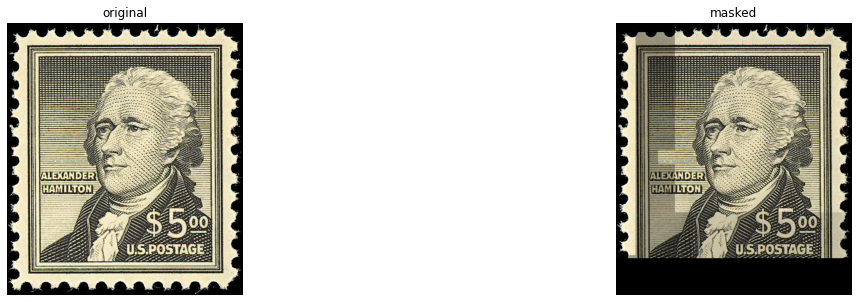

In [293]:
KVQA_VAL_PATH = '/data/diego/adv_comp_viz21/KVQAimgs/'
def get_image_path(img_id):
    image_file_path = KVQA_VAL_PATH + img_id + '.jpg'
    if not os.path.exists(image_file_path):
        exts = ['.JPG', '.JPEG', '.png', '.PNG', '.jpeg']
        for e in exts:
            image_file_path = KVQA_VAL_PATH + img_id + e
            if os.path.exists(image_file_path):
                break
    return image_file_path

def get_image_expl_vis(image_file_path, bbox_scores, bboxes, orig_img_dims):    
    orig_w = orig_img_dims.img_w.values[0]
    orig_h = orig_img_dims.img_h.values[0]
    bbox_scores = torch.tensor(bbox_scores)
    
    _, top_bboxes_indices = bbox_scores.topk(k=1, dim=-1)
    img = cv2.imread(image_file_path)
    mask = torch.zeros(img.shape[0], img.shape[1])
    #print(img.shape[0], img.shape[1])
    for index in range(len(bbox_scores)):
        [x, y, w, h] = bboxes[index]   
        x *= orig_w
        y *= orig_h
        w *= orig_w
        h *= orig_h
        
        #needed to save out bboxes as well! 
        #and rescale since they were normalized before being saved
        #print("Box",index,x,y,w,h)
        curr_score_tensor = mask[int(y):int(h), int(x):int(w)]     
        new_score_tensor = torch.ones_like(curr_score_tensor)*bbox_scores[index].item()
        mask[int(y):int(h), int(x):int(w)] = torch.max(new_score_tensor,mask[int(y):int(h), int(x):int(w)])
        
    mask = (mask - mask.min()) / (mask.max() - mask.min())
    mask = mask.unsqueeze_(-1)
    mask = mask.expand(img.shape)
    img = img * mask.cpu().data.numpy()
    cv2.imwrite('lxmert/lxmert/experiments/paper/new.jpg', img)
    masked_image = Image.open('lxmert/lxmert/experiments/paper/new.jpg')
    return masked_image

def show_bimodal_expl(qid, expl_res):
    img_id = qid.split("_")[0]
    image_file_path = get_image_path(img_id)

    orig_image = Image.open(image_file_path)
    fig, axs = plt.subplots(ncols=2, figsize=(20, 5))
    axs[0].imshow(orig_image);
    axs[0].axis('off');
    axs[0].set_title('original');
    
    orig_img_dims = imgid2dims[imgid2dims.img_id == int(img_id)]    
    #print("looking up ", img_id, "image_file_path", image_file_path, "orig_img_dims", orig_img_dims)
    
    masked_image = get_image_expl_vis(image_file_path, expl_res['image_expl'], expl_res['bboxes'], orig_img_dims)
    axs[1].imshow(masked_image);
    axs[1].axis('off');
    axs[1].set_title('masked');

    question_tokens = lxmert_tokenizer.tokenize(expl_res['sent'])
    text_scores = expl_res['text_expl']
    vis_data_records = [visualization.VisualizationDataRecord(text_scores,0,0,0,0,0, question_tokens,1)]
    visualization.visualize_text(vis_data_records)
    print("Question",qid,expl_res['sent'])
    print("TRUE ANSWER:", expl_res['true_ans'],  "PREDICTED: ", expl_res['top5'][0], "Top 1 / 5 Correct?", expl_res['top1acc'], expl_res['top5acc'])
    print("Top 5 answers:", expl_res['top5'] )
    print("Top 5 probs:", [round(v,4) for v in expl_res['top5probs']] )

#to show single question/model expl
sample_qid = list(ebert_records.keys())[38]
show_bimodal_expl(sample_qid, ebert_records[sample_qid])

Looking at Index: 9587
QID:  26513_1 : TRUE ANSWER: 80

Question For how many years did the person in the image live?
Plain predicted: 57
In Top 1: NopeXX , In Top 5: Yes
Plain Top 5 answers: ['57', '66', '56', '64', '80']
Plain Top 5 probs: [-2.8127, -2.9138, -3.1194, -3.3449, -3.4065] ---> Low Confidence so skip
Text expl:  [0.0, 0.5187, 0.6486, 0.5591, 1.0, 0.765, 0.4399, 0.1655, 0.4131, 0.4351, 0.5607, 0.9867, 0.4486, 0.3693]
Viz expl:  [0.0293, 0.2181, 0.0761, 0.109, 0.0511, 0.1645, 0.1863, 0.3565, 0.0283, 0.1785, 0.0, 0.1366, 0.1712, 0.0302, 0.1774, 0.1854, 0.0771, 0.0728, 1.0, 0.2151, 0.1538, 0.0253, 0.0749, 0.1939, 0.0386, 0.04, 0.0383, 0.0959, 0.0183, 0.1949, 0.0661, 0.0279, 0.0171, 0.0458, 0.3897, 0.1754]


True Label,Predicted Label,Attribution Label,Attribution Score,Word Importance
0,0 (0.00),0,0.00,for how many years did the person in the image live ?



Question For how many years did the person in the image live? Portrait of countess Elisabeth-Alexandrine de Ficquelmont, Princess Clary-Aldringen
Caption predicted: 71
In Top 1: NopeXX , In Top 5: NoXX
Caption Top 5 answers: ['71', '76', '70', '77', '68']
Caption Top 5 probs: [-3.3833, -3.4246, -3.4445, -3.4917, -3.526] ---> Low Confidence so skip
Text expl:  [0.0, 0.9999, 0.9999, 0.9999, 0.9999, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9999, 1.0, 1.0, 1.0, 1.0, 0.9999, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9999, 1.0, 1.0, 1.0, 0.9999]
Viz expl:  [0.0746, 0.1189, 0.1073, 0.2804, 0.0648, 0.2316, 0.178, 0.1813, 0.0845, 0.1145, 0.0868, 0.1061, 0.1078, 0.0314, 0.0504, 0.2258, 0.0365, 0.085, 0.7965, 0.0558, 0.083, 0.0, 0.0921, 0.1337, 0.0707, 0.0239, 0.0907, 0.0866, 0.0973, 0.335, 0.0415, 0.0862, 0.1104, 0.0878, 1.0, 0.2853]



Question For how many years did the person in the image live? Portrait of countess Elisabeth-Alexandrine de Count Karl Ludwig von Ficquelmont, Princess Clary-Aldringen
EBert predicted: 64
In Top 1: NopeXX , In Top 5: NoXX
EBert Top 5 answers: ['64', '66', '57', '74', '59']
EBert Top 5 probs: [-3.2786, -3.4311, -3.5169, -3.5785, -3.5925] ---> Low Confidence so skip
Text expl:  [0.0, 0.1701, 0.3185, 0.6713, 1.0, 0.1943, 0.3944, 0.2062, 0.2735, 0.4741, 0.2697, 0.4924, 0.3942, 0.5753, 0.6215, 0.6734, 0.5996, 0.5129, 0.5815, 0.5081, 0.6324, 0.7723, 0.4117, 0.628, 0.5951, 0.4769, 0.5351, 0.4619, 0.672, 0.6581, 0.4049, 0.6263, 0.6215, 0.582, 0.3635, 0.4142, 0.6245, 0.7135, 0.3975, 0.2089]
Viz expl:  [0.4127, 0.1958, 1.0, 0.0799, 0.1737, 0.0876, 0.3912, 0.5117, 0.0626, 0.3375, 0.0616, 0.283, 0.1802, 0.0626, 0.6151, 0.2287, 0.4977, 0.4132, 0.5063, 0.1502, 0.3418, 0.0649, 0.1861, 0.2052, 0.0039, 0.0775, 0.0, 0.096, 0.6581, 0.2144, 0.0846, 0.0616, 0.0166, 0.3636, 0.4883, 0.13]


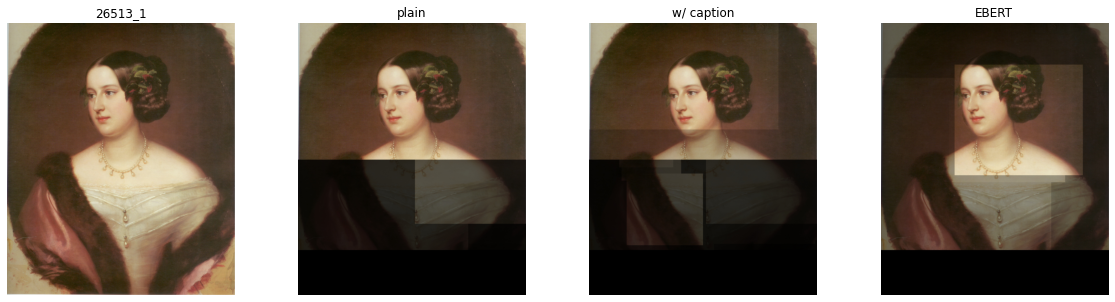

In [379]:
def show_kvqa_bimodal_expls(qid, plain_expl, capt_expl, ebert_expl):
    img_id = qid.split("_")[0]
    image_file_path = get_image_path(img_id)

    orig_image = Image.open(image_file_path)
    fig, axs = plt.subplots(ncols=4, figsize=(20, 5))
    axs[0].imshow(orig_image);
    axs[0].axis('off');
    axs[0].set_title(''+qid);
    
    orig_img_dims = imgid2dims[imgid2dims.img_id == int(img_id)]    
    #print("looking up ", img_id, "image_file_path", image_file_path, "orig_img_dims", orig_img_dims)
    
    masked_image = get_image_expl_vis(image_file_path, plain_expl['image_expl'], plain_expl['bboxes'], orig_img_dims)
    axs[1].imshow(masked_image);
    axs[1].axis('off');
    axs[1].set_title('plain');
    
    masked_image = get_image_expl_vis(image_file_path, capt_expl['image_expl'], capt_expl['bboxes'], orig_img_dims)
    axs[2].imshow(masked_image);
    axs[2].axis('off');
    axs[2].set_title('w/ caption');

    masked_image = get_image_expl_vis(image_file_path, ebert_expl['image_expl'], ebert_expl['bboxes'], orig_img_dims)
    axs[3].imshow(masked_image);
    axs[3].axis('off');
    axs[3].set_title('EBERT');
    
    
    print("QID: ",qid,": TRUE ANSWER:", plain_expl['true_ans'])
    
    i = 0
    title = ["Plain", "Caption", "EBert"]
    for expl in [plain_expl, capt_expl, ebert_expl]:
        print("\nQuestion",expl['sent'])
        print(title[i]+" predicted:", expl['top5'][0])
        print("In Top 1:", "Correct!" if expl['top1acc'] == 1 else "NopeXX", ", In Top 5:", "Yes" if expl['top5acc'] == 1 else "NoXX")
        print(title[i]+" Top 5 answers:", expl['top5'] )
        if expl['top5probs'][0] < -1:
            conf = "Low Confidence so skip"
        elif expl['top5probs'][0] > -1 and expl['top5probs'][0] < 0:
            conf = "Borderline"
        else:
            conf = "High Confidence"
        print(title[i]+" Top 5 probs:", [round(v,4) for v in expl['top5probs']], "--->", conf )
        print("Text expl: ", expl['text_expl'] )
        print("Viz expl: ", expl['image_expl'] )

        question_tokens = lxmert_tokenizer.tokenize(expl['sent'])
        text_scores = expl['text_expl']
        vis_data_records = [visualization.VisualizationDataRecord(text_scores,0,0,0,0,0, question_tokens,1)]
        visualization.visualize_text(vis_data_records)
        i += 1
    
#possible ids: 13979, 9729, 10774
#7896, 
import random
random_index = random.randint(0,len(ebert_records))
sample_qid = list(ebert_records.keys())[random_index]
print("Looking at Index:", random_index)
show_kvqa_bimodal_expls(sample_qid, plain_records[sample_qid], capt_records[sample_qid], ebert_records[sample_qid])

In [344]:
abs_path = "/home/diego/adv_comp_viz21/lxmert/orig_code/lxmert/"
kvq
ks = list(entity_spans_dict.keys())
random_index = random.randint(0,len(ks))
print(random_index, ks[random_index], entity_spans_dict[ks[random_index]])  #wikiCapnew
capt_ent = kvqa_qs[str(ks[random_index])]
print("\n",{'wikiCap':capt_ent['wikiCap'], 'ents':capt_ent['NamedEntities']}) #'wikiCap': 'Allison Cratchley played Melissa Gregg.',
#list(kvqa_qs.keys())[0]

"""
#1. Cases where entity doesn't appear exactly as is in wikiCap and wikiCap_new has full name "incorrectly"
15365 {'wikiCap_new': "Leonard Cohen at King's Garden, Odense, Denmark, August 17, 2013", 'ents_found': [['Leonard Cohen', 0, 13]]}
        wikiCap: Cohen at King's Garden, Odense, Denmark, August 17, 2013

13588 {'wikiCap_new': 'Garth Brooks at the We Are One concert in 2009', 'ents_found': [['Garth Brooks', 0, 12]]}
       {'wikiCap': 'Brooks at the We Are One concert in 2009', 'ents': ['Garth Brooks']}

27830 {'wikiCap_new': 'Engraving of Henry Pottinger', 'ents_found': [['Henry Pottinger', 13, 28]]}
      {'wikiCap': 'Engraving of Pottinger', 'ents': ['Henry Pottinger']}

#2 Cases where wikiCap_new == wikiCap and entity appears as is in wikiCap
35940 {'wikiCap_new': 'Statue of Lefter Küçükandonyadis at Yoğurtçu Park, close to Şükrü Saracoğlu Stadium, in Kadıköy, Istanbul.', 
        'ents_found': [['Lefter Küçükandonyadis', 10, 32]]}
      {'wikiCap': 'Statue of Lefter Küçükandonyadis at Yoğurtçu Park, close to Şükrü Saracoğlu Stadium, in Kadıköy, Istanbul.', 
        'ents': ['Lefter Küçükandonyadis']}
        
18610 {'wikiCap_new': 'Vidya Balan at a promotional event for Shaadi Ke Side Effects in 2014', 
        'ents_found': [['Vidya Balan', 0, 11]]}
       {'wikiCap': 'Vidya at a promotional event for Shaadi Ke Side Effects in 2014', 'ents': ['Vidya Balan']}
       
#3. Cases where entity doesn't appear in wikiCap and is prepended to wikiCap_new
   
46393 {'wikiCap_new': 'Charlton Heston Janet Leigh In Touch of Evil (1958)', 
       'ents_found': [['Janet Leigh', -20, -9], ['Charlton Heston', -20, -5]]}
        wikiCap: In Touch of Evil (1958)
       
46785 {'wikiCap_new': "Gaoming District Gao Zhisheng's wife Geng He speaking publicly to help her husband in 2011", 
       'ents_found': [['Gaoming District', -20, -4], ['Gao Zhisheng', 0, 12]]}
      {'wikiCap': "Gao Zhisheng's wife Geng He speaking publicly to help her husband in 2011", 'ents': ['Gaoming District', 'Gao Zhisheng']}
 
"""
print()

22962 46785 {'wikiCap_new': "Gaoming District Gao Zhisheng's wife Geng He speaking publicly to help her husband in 2011", 'ents_found': [['Gaoming District', -20, -4], ['Gao Zhisheng', 0, 12]]}

 {'wikiCap': "Gao Zhisheng's wife Geng He speaking publicly to help her husband in 2011", 'ents': ['Gaoming District', 'Gao Zhisheng']}



True Label,Predicted Label,Attribution Label,Attribution Score,Word Importance
0,0 (0.00),0,0.00,in which continent was the person in the image born ?


Question 22113_4 In which continent was the person in the image born?
TRUE ANSWER: North America PREDICTED:  North America Top 1 / 5 Correct? 1 1
Top 5 answers: ['North America', 'Europe', 'South America', 'Africa', 'Asia']
Top 5 probs: [0.5348, -0.8199, -4.8877, -5.3137, -5.6669]


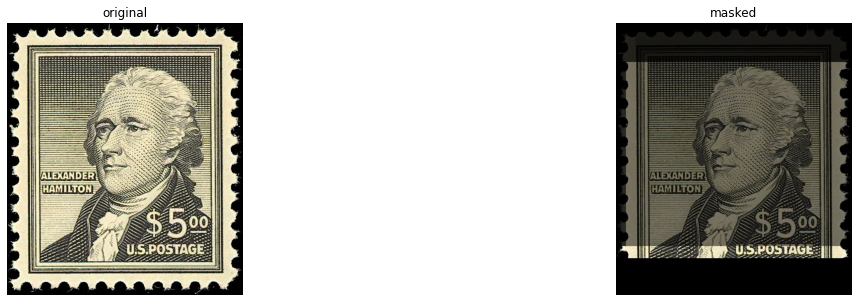

In [ ]:
correct_examples = { r:records[r] for r in records if records[r]['top1acc'] == 1 }
incorrect1_butintop5_examples = { r:records[r] for r in records if records[r]['top1acc'] == 0 and records[r]['top5acc'] == 1 }
incorrect_examples = { r:records[r] for r in records if records[r]['top1acc'] == 0 and records[r]['top5acc'] == 0 }

print("Correct: ",len(correct_examples), "out of", len(records), "= ", round(len(correct_examples)/len(records),4))
print("Incorrect but in Top 5: ",len(incorrect1_butintop5_examples), "out of", len(records), "= ", round(len(incorrect1_butintop5_examples)/len(records),4))
print("Incorrect: ",len(incorrect_examples), "out of", len(records), "= ", round(len(incorrect_examples)/len(records),5))

# now control only looking at those where they are the same vs differenct 
#img_id = 29704
#print("\nNew: ",img_id, entity_spans_dict[img_id]['wikiCap_new'])
#print("Orig: ",kvqa_qs[str(img_id)]['wikiCap'])

tot_ex, tot_diff = 0, 0
correct_ex, correct_ex_diff = {}, {}
incorrect1_butintop5_ex, incorrect1_butintop5_ex_diff = {},{}
incorrect_ex, incorrect_ex_diff = {},{}
for r in records:
    img_id = r.split("_")[0]
    if kvqa_qs[str(img_id)]['wikiCap'] == entity_spans_dict[img_id]['wikiCap_new']:
        tot_ex +=1 
        if records[r]['top1acc'] == 1:
            correct_ex[r] = records[r]
        if records[r]['top1acc'] == 0 and records[r]['top5acc'] == 1:
            incorrect1_butintop5_ex[r] = records[r]
        if records[r]['top1acc'] == 0 and records[r]['top5acc'] == 0:
            incorrect_ex[r] = records[r]
    else:
        tot_diff +=1 
        if records[r]['top1acc'] == 1:
            correct_ex_diff[r] = records[r]
        if records[r]['top1acc'] == 0 and records[r]['top5acc'] == 1:
            incorrect1_butintop5_ex_diff[r] = records[r]
        if records[r]['top1acc'] == 0 and records[r]['top5acc'] == 0:
            incorrect_ex_diff[r] = records[r]

print("\nFor ",tot_ex,"Questions where wikiCap == wikiCap_new", round(tot_ex/len(records),5))
print("Correct: ",len(correct_ex), "out of", tot_ex, "= ", round(len(correct_ex)/tot_ex,4))
print("Incorrect but in Top 5: ",len(incorrect1_butintop5_ex), "out of", tot_ex, "= ", round(len(incorrect1_butintop5_ex)/tot_ex,4))
print("Incorrect: ",len(incorrect_ex), "out of", tot_ex, "= ", round(len(incorrect_ex)/tot_ex,4))

print("\nFor ",tot_diff,"Questions where wikiCap Not equal wikiCap_new", round(tot_diff/len(records),5))
print("Correct: ",len(correct_ex_diff), "out of", tot_diff, "= ", round(len(correct_ex_diff)/tot_diff,4))
print("Incorrect but in Top 5: ",len(incorrect1_butintop5_ex_diff), "out of", tot_diff, "= ", round(len(incorrect1_butintop5_ex_diff)/tot_diff,4))
print("Incorrect: ",len(incorrect_ex_diff), "out of", tot_diff, "= ", round(len(incorrect_ex_diff)/tot_diff,4))

    
""" KVQA ebert split 3
Correct:  10236 out of 19248 =  0.5317955112219451
Incorrect but in Top 5:  3125 out of 19248 =  0.16235453034081462
Incorrect:  5887 out of 19248 =  0.3058499584372402

#Controlling for wikiCap == wikiCap_new, we get a little bump but not much (.15) from 

For  6741 Questions where wikiCap == wikiCap_new 0.35022
Correct:  3578 out of 6741 =  0.5308
Incorrect but in Top 5:  1012 out of 6741 =  0.1501
Incorrect:  2151 out of 6741 =  0.3191

For  12507 Questions where wikiCap Not equal wikiCap_new 0.64978
Correct:  6658 out of 12507 =  0.5323
Incorrect but in Top 5:  2113 out of 12507 =  0.1689
Incorrect:  3736 out of 12507 =  0.2987
"""

#  if we want we can take data/kvqa/new_kvqa_q_caps_ents0502.json
#   and add new nps_ents found 
#    by removing -20 ents from wikiCap new and ents_founds, 
#    and then finding ents in ents_found and find out what correct indexes for original ents should be
#    ( ie wikiCap and wikiCap new should be identical.  all i want is to have the correct spans where I should add slash dot )

print()

In [250]:
#LOOK AT ACCURACY BY IMG
acc_by_img_id = {}
for r in records:
    i = r.split("_")[0]
    if i not in acc_by_img_id:
        acc_by_img_id[i] = { "top1":0, "top5":0, "neither":0, "keys":[] }
    if records[r]['top1acc'] == 1:
        acc_by_img_id[i]["top1"] += 1
    elif records[r]['top5acc'] == 1:
        acc_by_img_id[i]["top5"] += 1
    else:
        acc_by_img_id[i]["neither"] += 1
    acc_by_img_id[i]['keys'].append(r)
        
all_right = [ r for r in acc_by_img_id if acc_by_img_id[r]['top5'] == 0 and acc_by_img_id[r]['neither'] == 0 ]
all_top5 =  [ r for r in acc_by_img_id if acc_by_img_id[r]['neither'] == 0 ]
all_top5nwrong = [ r for r in acc_by_img_id if acc_by_img_id[r]['top1'] == 0 ]
all_wrong = [ r for r in acc_by_img_id if acc_by_img_id[r]['top1'] == 0 and acc_by_img_id[r]['top5'] == 0 ]
all_mixed_num = len(acc_by_img_id) - (len(all_right) + len(all_top5) + len(all_top5nwrong) + len(all_wrong))

print("Unique imgs:", len(acc_by_img_id))
print("Num all right: ", len(all_right), len(all_right)/len(acc_by_img_id))
print("Num all top1 and top5: ", len(all_top5), len(all_top5)/len(acc_by_img_id))
print("Num all top5 and wrong: ", len(all_top5nwrong), len(all_top5nwrong)/len(acc_by_img_id))
print("Num all wrong: ", len(all_wrong), len(all_wrong)/len(acc_by_img_id))
print("Num mixed: ", all_mixed_num, all_mixed_num / len(acc_by_img_id))

print(list(acc_by_img_id.keys())[0])
#print(acc_by_img_id['14251'], records['14251_0']['ents'])
for r in acc_by_img_id['43793']['keys']:
    print(r,"\n\t",records[r]['sent'], "\n\t",records[r]['true_ans'],"--->",records[r]['top5'])
    print("\t", records[r]['top1acc'], records[r]['top5acc'])


""" EBERT split 3
Unique imgs: 2604
Num all right:  2 0.0007680491551459293
Num all top1 and top5:  18 0.0069124423963133645
Num all top5 and wrong:  20 0.007680491551459293
Num all wrong:  0 0.0
Num mixed:  2564 0.9846390168970814   <-- like Tiny most things are mixed 
"""
print()

Unique imgs: 2604
Num all right:  2 0.0007680491551459293
Num all top1 and top5:  18 0.0069124423963133645
Num all top5 and wrong:  20 0.007680491551459293
Num all wrong:  0 0.0
Num mixed:  2564 0.9846390168970814
43793
43793_0 
	 Who is in the left? Feodor Chaliapin and Paolo Tornaghi 
	 Feodor Chaliapin ---> ['Suraiya', 'Indira Gandhi', 'Alla Nazimova', 'Zhou Enlai', 'Rudolph Valentino']
	 0 0
43793_1 
	 Who is in the right? Feodor Chaliapin and Paolo Tornaghi 
	 Paolo Tornaghi ---> ['Suraiya', 'Indira Gandhi', 'Alla Nazimova', 'Zhou Enlai', 'El Brendel']
	 0 0
43793_2 
	 Who is to the left of Feodor Chaliapin? Feodor Chaliapin and Paolo Tornaghi 
	 Paolo Tornaghi ---> ['Indira Gandhi', 'Suraiya', 'Zhou Enlai', 'Alla Nazimova', 'Jawaharlal Nehru']
	 0 0
43793_3 
	 Who is to the right of Paolo Tornaghi? Feodor Chaliapin and Paolo Tornaghi 
	 Feodor Chaliapin ---> ['Suraiya', 'Indira Gandhi', 'Alla Nazimova', 'Zhou Enlai', 'Rudolph Valentino']
	 0 0
43793_4 
	 Who among the people in t

In [252]:
# DO ACC BY NUM ENTS
acc_by_numents = {}
for r in records:
    i = records[r]['ents']
    if i not in acc_by_numents:
        acc_by_numents[i] = { "top1":0, "top5":0, "neither":0, "keys":[] }
    if records[r]['top1acc'] == 1:
        acc_by_numents[i]["top1"] += 1
    elif records[r]['top5acc'] == 1:
        acc_by_numents[i]["top5"] += 1
    else:
        acc_by_numents[i]["neither"] += 1
    acc_by_numents[i]['keys'].append(r)
        
for i in acc_by_numents:
    r = acc_by_numents[i]
    rt1, rt5, rn = r['top1'], r['top5'], r['neither']
    ra = len(r['keys'])
    print(i, ra, rt1, round(rt1/ra,4), rt5, round(rt5/ra,4), rn, round(rn/ra,4))

qid = acc_by_numents[5]['keys'][0]
img_id = qid.split("_")[0]
print(acc_by_img_id[img_id])
tot_right = 0
tot = 0
new_skipped = 0
new_right = 0

for r in acc_by_img_id[img_id]['keys']:
    print(r,"\n\t",records[r]['sent'], "\n\t",records[r]['true_ans'],"--->",records[r]['top5'])
    print("\t", records[r]['top1acc'], records[r]['top5acc'], records[r]['top5probs'])
    tot += 1
    if records[r]['top1acc']:
        tot_right += 1
        
    if records[r]['top5probs'][0] < -1:
        conf = "Low Confidence so skip"
        new_skipped += 1
    else:
        if records[r]['top1acc']:
            new_right += 1

        if records[r]['top5probs'][0] > -1 and records[r]['top5probs'][0] < 0:
            conf = "Borderline"
        else:
            conf = "High Confidence"

    print("\t", conf)
    #sample_qid = r
    #show_bimodal_expl(sample_qid, records[sample_qid])
print("Normal ACC:", tot_right, "/", tot, "=", round(tot_right/tot,4))
print("Counter ACC:", new_right, "/", (tot - new_skipped), "=", round(new_right/(tot - new_skipped),4))


## USING EBERT split 3 full
"""
i, num, top1, pct , top5,  pct, wrong, pct
1 13778 7826 0.568  1766 0.1282 4186 0.3038     #so with 1 ents its best chance and goes down from there
2  4507 2098 0.4655 1074 0.2383 1335 0.2962
3   679  224 0.3299  199 0.2931  256 0.377
4   211   65 0.3081   60 0.2844   86 0.4076
5    73   23 0.3151   26 0.3562   24 0.3288

{'top1': 5, 'top5': 7, 'neither': 5, 'keys': ['1223_0', '1223_1', ... ]}

# Normal ACC: 5 / 17 = 0.2941
# Counter ACC: 4 / 8 = 0.5     <--- using calibration this is top1 ... TODO: add top 5
"""

print()

2 4507 2098 0.4655 1074 0.2383 1335 0.2962
1 13778 7826 0.568 1766 0.1282 4186 0.3038
3 679 224 0.3299 199 0.2931 256 0.377
4 211 65 0.3081 60 0.2844 86 0.4076
5 73 23 0.3151 26 0.3562 24 0.3288
{'top1': 5, 'top5': 7, 'neither': 5, 'keys': ['1223_0', '1223_1', '1223_2', '1223_3', '1223_4', '1223_5', '1223_6', '1223_7', '1223_8', '1223_9', '1223_10', '1223_11', '1223_12', '1223_13', '1223_14', '1223_15', '1223_16']}
1223_0 
	 Who is in the left? Sergey Lavrov Ban Ki-moon Hillary Clinton Tony Blair Ashton (far right) with the rest of the Quartet on the Middle East (2010) 
	 Tony Blair ---> ['Barack Obama', 'Michelle Obama', 'Hillary Clinton', 'Dmitry Medvedev', 'Vladimir Putin']
	 0 0 [-2.34442, -2.71344, -2.92764, -3.11269, -3.28154]
	 Low Confidence so skip
1223_1 
	 Who is in the right? Sergey Lavrov Ban Ki-moon Hillary Clinton Tony Blair Ashton (far right) with the rest of the Quartet on the Middle East (2010) 
	 Catherine Ashton ---> ['Barack Obama', 'Michelle Obama', 'Hillary Clint

In [253]:
# DO ACC BY Q TYPE ( TODO: pull in question data here )
#!wget http://www.diegoolano.com/files/kvqa_dataset_with_entity_info_and_ref_imgs_v6cum.json   

import json
with open("kvqa_dataset_with_entity_info_and_ref_imgs_v6cum.json","r") as f:
    kvqa_qs = json.load(f)
    
    

In [391]:
sample_id = list(kvqa_qs.keys())[1349]
print(sample_id, kvqa_qs[sample_id])

32918 {'NamedEntities': ['Betico Croes'], 'imgPath': 'KVQAimgs/32918.JPG', 'ParaQuestions': ['Who is the person in the picture?', 'For how many years did the person in the picture live?', 'Was the person in the picture born after the end of World War II?', 'In which country was the person in the picture born?', 'In which landmass was the person in the picture born?', 'Is the person in the picture a politician?'], 'Qids': ['Q2099297'], 'Questions': ['Who is the person in the image?', 'For how many years did the person in the image live?', 'Was the person in the image born after the end of World War II?', 'In which country was the person in the image born?', 'In which continent was the person in the image born?', 'Is the person in the image a politician?'], 'split': [3, 1, 1, 1, 1], 'wikiCap': 'A monument on Plaza Libertador in Oranjestad, Aruba, showing "Betico" Croes holding an Aruban flag.', 'Answers': ['Betico Croes', '48', 'No', 'Kingdom of the Netherlands', 'Europe', 'Yes'], 'Type 

In [254]:
sample_id = list(kvqa_qs.keys())[0]
#print(sample_id, kvqa_qs[sample_id])
# ['NamedEntities', 'imgPath', 'ParaQuestions', 
# 'Qids', 'Questions', 'split', 'wikiCap', 'Answers', 
# 'Type of Question', 'Entities', 'ref_imgs', 'img_equals_ref', 'contains_no_ref', 'contains_img_eq_ref', 
# 'mtcnn_res', 'img_width', 'img_height']


qid2qtype = {}
qs, qerrs = 0, []
for imgid in list(kvqa_qs.keys()):
    imgdata = kvqa_qs[imgid]
    for i,q in enumerate(imgdata['Questions']):
        qs += 1
        qid = imgid + "_" +str(i)
        try:
            qid2qtype[qid] = imgdata['Type of Question'][i]
        except Exception as e:
            #print("Error on ",qid,len(imgdata['Questions']), len(imgdata['Type of Question']))#, imgdata['Type of Question'])
            qid2qtype[qid] = []
            qerrs.append(qid)
print("no question type for ", len(qerrs), "out of ", qs)  #68 out of  183007

qtype_res = {'1-hop': {'correct':0,'total':0}, 'multi-hop':{'correct':0,'total':0}}
c = 0
for r in records:
    #print(r, qid2qtype[r])
    qtypes = qid2qtype[r]
    level = '1-hop'
    if '1-hop' not in qtypes:
        level = 'multi-hop'
        
    qtype_res[level]['total'] +=1
    if records[r]['top1acc'] == 1:
        qtype_res[level]['correct'] +=1
    for qt in qtypes:
        if qt != level:
            if qt not in qtype_res[level]:
                qtype_res[level][qt] = {'correct':0,'total':0}
            qtype_res[level][qt]['total'] +=1
            if records[r]['top1acc'] == 1:
                qtype_res[level][qt]['correct'] +=1

for level in ['1-hop', 'multi-hop']:
    qtype_res[level]['pct'] = round(qtype_res[level]['correct']/ qtype_res[level]['total'],4)
    print("\n"+level)
    for k in list(qtype_res[level].keys()):
        #print(str(type(qtype_res[level][k])))
        if type(qtype_res[level][k]) == dict:
            qtype_res[level][k]['pct'] = round(qtype_res[level][k]['correct']/ qtype_res[level][k]['total'],4)
        print(k, qtype_res[level][k])
   

""" EBERT split 3 full
no question type for  68 out of  183007

1-hop:
correct 7135
total 14437
pct 0.4942
Multi-Relation {'correct': 3271, 'total': 6794, 'pct': 0.4815}
       boolean {'correct': 4333, 'total': 4906, 'pct': 0.8832}
  Multi-Entity {'correct': 2968, 'total': 3673, 'pct': 0.8081}
    comparison {'correct': 2379, 'total': 2745, 'pct': 0.8667}
       spatial {'correct':   40, 'total': 1488, 'pct': 0.0269}   <--- super bad
   subtraction {'correct':   39, 'total': 1334, 'pct': 0.0292}   <--- super bad
      counting {'correct': 1019, 'total': 1163, 'pct': 0.8762}
  intersection {'correct':  343, 'total':  437, 'pct': 0.7849}


Italy {'correct': 0, 'total': 1, 'pct': 0.0}  <<-- ERROR in data


multi-hop:
correct 3101
total 4811
pct 0.6446
Multi-Relation {'correct': 2835, 'total': 4050, 'pct': 0.7}
       boolean {'correct':  473, 'total':  645, 'pct': 0.7333}
  Multi-Entity {'correct': 1232, 'total': 2106, 'pct': 0.585}
    comparison {'correct':  159, 'total':  327, 'pct': 0.4862}
      counting {'correct':  497, 'total':  704, 'pct': 0.706}
1-hop subtract {'correct':  185, 'total':  648, 'pct': 0.2855} <-- bad
  intersection {'correct':  234, 'total':  323, 'pct': 0.7245}
1-hop counting {'correct':   77, 'total':  109, 'pct': 0.7064}

"""

print()

no question type for  68 out of  183007

1-hop
correct 7135
total 14437
spatial {'correct': 40, 'total': 1488, 'pct': 0.0269}
comparison {'correct': 2379, 'total': 2745, 'pct': 0.8667}
Multi-Entity {'correct': 2968, 'total': 3673, 'pct': 0.8081}
Multi-Relation {'correct': 3271, 'total': 6794, 'pct': 0.4815}
counting {'correct': 1019, 'total': 1163, 'pct': 0.8762}
intersection {'correct': 343, 'total': 437, 'pct': 0.7849}
boolean {'correct': 4333, 'total': 4906, 'pct': 0.8832}
subtraction {'correct': 39, 'total': 1334, 'pct': 0.0292}
Italy {'correct': 0, 'total': 1, 'pct': 0.0}
pct 0.4942

multi-hop
correct 3101
total 4811
1-hop subtraction {'correct': 185, 'total': 648, 'pct': 0.2855}
comparison {'correct': 159, 'total': 327, 'pct': 0.4862}
Multi-Entity {'correct': 1232, 'total': 2106, 'pct': 0.585}
counting {'correct': 497, 'total': 704, 'pct': 0.706}
Multi-Relation {'correct': 2835, 'total': 4050, 'pct': 0.7}
intersection {'correct': 234, 'total': 323, 'pct': 0.7245}
boolean {'correc

In [ ]:
# SHOW SELECTION OF CORRECT VS INCORRECT 
# IS explainability for EBERT examples correct?  <-- very important
# SHould I be using method = ours_nolrp?

# Run full experiments for plain, caption, and ebert( when you've figured out accuracy issue ( and ebert works )

# How to calculate difference between experiments

In [356]:
# Debugging OKVQA
abs_path = "/home/diego/adv_comp_viz21/lxmert/orig_code/lxmert/"
entity_spans_dict = json.load(open(abs_path + "data/okvqa/okvqa_ent_spans_may06_excluded.json")) 

In [376]:
#len(entity_spans_dict)  #14055
#es_ks = list(entity_spans_dict.keys())   #'list' object has no attribute 'keys
#entity_spans_dict[0]   #[['hairstyle', 12, 21], ['blond', 29, 34]]   <-- for what is this!

#NEXT FIGURE OUT HOW THIS LINES UP TO QUESTIONS IN OKVQA <--- 
OKVQA_DATA_ROOT = '/home/diego/adv_comp_viz21/lxmert/orig_code/lxmert/data/okvqa/' 

#split = "train"  #train, val, train_tv, val_tv,  test_tv, 
split = "test_tv"
if "tv" in split:
    qfile = OKVQA_DATA_ROOT + split.split("_")[0] + "_qs_okvqa.json"
    afile = OKVQA_DATA_ROOT + split.split("_")[0] + "_ans_okvqa.json"
else:
    qfile = OKVQA_DATA_ROOT + "OpenEnded_mscoco_" + split + "2014_questions.json"
    afile = OKVQA_DATA_ROOT + "mscoco_" + split + "2014_annotations.json"

cur_split = json.load(open(qfile))
cur_split_ans = json.load(open(afile))

In [377]:
c_ks = list(cur_split.keys())
a_ks = list(cur_split_ans.keys())
#print(c_ks)   #['license', 'data_subtype', 'task_type', 'questions', 'info', 'data_type']
#print(a_ks)   #['license', 'data_subtype', 'question_types', 'annotations', 'info', 'data_type']
#cur_split[c_ks[0]], cur_split_ans[a_ks[0]]
print(len(cur_split['questions']), len(entity_spans_dict))  
#9009 14055    #split = "train"
#5046 14055    #split = "test_tv"

#cur_split['questions'][0], entity_spans_dict[0]
#{'image_id': 51606, 'question': 'What is the hairstyle of the blond called?', 'question_id': 516065}, RIGHT #train

#cur_split['questions'][0], entity_spans_dict[0]
#{'image_id': 297147, 'question': 'What sport can you use this for?', 'question_id': 2971475}, WRONG         #test_tv

# for test_tv   #<--- THIS IS THE TRICK !!! FOR TESTING YOU NEED TO ADD 9009 to the index!
cur_split['questions'][0], entity_spans_dict[9009]   
#({'image_id': 297147,  'question': 'What sport can you use this for?',  'question_id': 2971475},  [['sport', 5, 10]])   RIGHT


5046 14055


({'image_id': 297147,
  'question': 'What sport can you use this for?',
  'question_id': 2971475},
 [['sport', 5, 10]])

In [ ]:
# THE BELOW WAS JUST TO DEBUG THE DIFFERENCE BETWEEN THE CODE BASES THAT WAS CAUSING THE DIFFERENCE IN ACC
# IT TURNS OUT IT WASN'T THE CODE, but rather that the new code install torch 1.7.0  and the other expected 1.8.0
# see lxmert_gen_integ_notes for more details

In [193]:
!pwd  #/home/diego/adv_comp_viz21/lxmert/orig_code/lxmert_gen/Transformer-MM-Explainability-main

/home/diego/adv_comp_viz21/lxmert/orig_code/lxmert_gen/Transformer-MM-Explainability-main


In [236]:
# LOOKING AT DIFF BETWEEN OLD AND NEW SYSTEMS
"""
Is the prior way of eval the same as the new one?   Ie, Split 0 for new is over 18697 results ( how about for prior? )   

python lxmert/lxmert/perturbation_kvqa.py --num-samples=0 --use_lm ebert  
      --method ours_no_lrp --split_num 0 --test test_kvqa 
      --load /home/diego/adv_comp_viz21/lxmert/orig_code/lxmert/snap/kvqa/kvqa_ebert_sp0_0/BEST 
      --pred_out experiments/kvqa_ebert_0_830.json
                --> Elapsed: 1868.
      //   split 0 ,  ebert,     top1/top5 Acc/Raw: [49.05, 68.25, 9170, 12760, 18697 ***]   

//prior way below ( see src/tasks/kvqa.py )

test_file_name = "test_predict"+args.split_num + ".json"

result = kvqa.evaluate( 
      test_tuple,
      dump=os.path.join(args.output, test_file_name) )

vevaluator.dump_result(quesid2ans, dump)


bash run/kvqa_test.bash 2 kvqa_ebert_sp3_results 3 --use_lm ebert --max_len 100 --test test_kvqa --load snap/kvqa/kvqa_ebert_sp3_3/BEST  

the run script 
output=snap/kvqa/$name
--output $output

RESULTS in 
lxmert/orig_code/lxmert/snap/kvqa/kvqa_ebert_sp0_results_0$ ls

run.bash  src  test_predict0.json

wc -l test_predict0.json    #74789 test_predict0.json    <— IS THIS THE SAME NUMBER OF Qs that NEW HAS?

OTHER
diego@macrodeep:~/adv_comp_viz21/lxmert/orig_code/lxmert_gen/Transformer-MM-Explainability-main/experiments$ 
wc -l kvqa_ebert_0_830.json    —>   0 

"""
import json
#/home/diego/adv_comp_viz21/lxmert/orig_code/lxmert_gen/Transformer-MM-Explainability-main
prior_ebert0_res = "../../lxmert/snap/kvqa/kvqa_ebert_sp0_results_0/test_predict0.json"
new_ebert0_res = "../../lxmert_gen/Transformer-MM-Explainability-main/experiments/kvqa_ebert_0_830.json"

prior_ebert0_res = "../../lxmert/snap/kvqa/kvqa_ebert_sp4_results_4/test_predict4.json"
new_ebert0_res = "../../lxmert_gen/Transformer-MM-Explainability-main/experiments/kvqa_ebert_4_0901.json"

#prior_ebert0_res = "../../lxmert/snap/kvqa/kvqa_ebert_sp3_results_3/test_predict3.json"  #prior initial with 53
#new_ebert0_res = "../../lxmert_gen/Transformer-MM-Explainability-main/experiments/kvqa_ebert_3_0901.json"  #gives bad 50%

#using lxmo in lxmert ( prior code )
prior_ebert0_res = "../../lxmert/snap/kvqa/kvqa_ebert_sp3_test_lxmo_env_3/test_predict3.json"  
#gives same good 53 results as prior initial

#using lxmert_expl in lxmert_gen
#prior_ebert0_res = "../../lxmert_gen/snap/kvqa/kvqa_ebert_sp3_test_env_3/test_predict3.json"   
#gives new bad 50 results

#using lxmert_expl in lxmert
#prior_ebert0_res = "../../lxmert/snap/kvqa/kvqa_ebert_sp3_test_expl_env_3/test_predict3.json"  
#gives same bad 50 results

#using newlxmo in lxmert_gen ( new code )
new_ebert0_res = "../../lxmert_gen/Transformer-MM-Explainability-main/experiments/kvqa_ebert_3_newlxmo_0901.json"



#prior_ebert0_res = "../../lxmert/snap/kvqa/kvqa_ebert_sp2_results_2/test_predict2.json"
#new_ebert0_res = "../../lxmert_gen/Transformer-MM-Explainability-main/experiments/kvqa_ebert_2_0901.json"



with open(prior_ebert0_res, "r") as fp:
    prior_eb0 = json.load(fp)
    
with open(new_ebert0_res, "r") as fp:
    new_eb0 = json.load(fp)
    
# SPLIT 0: both have 18697
# SPLIT 2: both have 18696
# SPLIT 3: both have 19248
# SPLIT 4: both have 18120
print(len(prior_eb0), len(new_eb0), type(prior_eb0), type(new_eb0))  

19248 19248 <class 'list'> <class 'dict'>


In [237]:
print(prior_eb0[0])  #{'answer': 'Yes', 'question_id': '22511_0'}   #TODO, improve these prior dumped out results!!
#prior_ks = list(prior_eb0.keys())
#new_ks = list(new_eb0.keys())

prior_dict = { p['question_id']: p['answer'] for p in prior_eb0 }
comb_res = {}
for qid in prior_dict:
    comb_res[qid] = {'prior_ans': prior_dict[qid], 'new_ans': new_eb0[qid]}
    
#print("\n",comb_res['22511_0'])

{'answer': 'Suraiya', 'question_id': '43793_0'}


In [238]:
acc_prior, acc_new = 0, 0
same_preds_right, same_preds_wrong, diff_preds_bothwrong, diff_preds_newright, diff_preds_oldright = [],[],[],[],[]
for qid in comb_res:
    ans = comb_res[qid]['new_ans']['true_ans']
    pred_new = comb_res[qid]['new_ans']['top5'][0]
    pred_prior = comb_res[qid]['prior_ans']
    acc_new += comb_res[qid]['new_ans']['top1acc']
    acc_prior += 1 if pred_prior == ans else 0
    if pred_new == pred_prior:
        if pred_prior == ans:
            same_preds_right.append([qid,pred_new,pred_prior])
        else:
            same_preds_wrong.append([qid,pred_new,pred_prior])
    elif comb_res[qid]['new_ans']['top1acc'] == 1 and pred_prior != ans:
        diff_preds_newright.append([qid,pred_new,pred_prior])
    elif comb_res[qid]['new_ans']['top1acc'] == 0 and pred_prior == ans:
        diff_preds_oldright.append([qid,pred_new,pred_prior])        
    else:
        diff_preds_bothwrong.append([qid,pred_new,pred_prior])
        
n = len(comb_res)
print("Prior/New",acc_prior, acc_new, n, round(acc_prior/n,4), round(acc_new/n,4))  #they differ by 11
print("\nSame Preds right:",len(same_preds_right), round(len(same_preds_right)/n,4))
print("Same Preds wrong:",len(same_preds_wrong), round(len(same_preds_wrong)/n,4))
print("Diff Preds both wrong:",len(diff_preds_bothwrong), round(len(diff_preds_bothwrong)/n,4))
print("Diff Preds prior right:", len(diff_preds_oldright), round(len(diff_preds_oldright)/n,4))
print("Diff Preds new right:", len(diff_preds_newright), round(len(diff_preds_newright)/n,4))

print("Total", len(same_preds_right) + len(same_preds_wrong) + len(diff_preds_oldright) + len(diff_preds_newright) + len(diff_preds_bothwrong) )

""" 
EBERT 0 results
Prior/New 9659 9170 18697 0.5166 0.4905   ( 2.6 diff)

     Same Preds right: 8734 0.4671
     Same Preds wrong: 5858 0.3133
Diff Preds both wrong: 2744 0.1468
Diff Preds prior right: 925 0.0495
  Diff Preds new right: 436 0.0233
               Total: 18697      --> So they differ by 4105 predictions out of 18697 ( 21%... 2744 + 925 + 436 = 4105)!! 

Missing EBERT 1

EBERT 2 Results
Prior/New 9745 9304 18696 0.5212 0.4976

     Same Preds right: 8953 0.4789
     Same Preds wrong: 5210 0.2787
Diff Preds both wrong: 3390 0.1813
Diff Preds prior right: 792 0.0424
  Diff Preds new right: 351 0.0188
                Total 18696      --> So they differ by 4105 predictions out of 18697 ( 24%... 4533)!!  

EBERT 3 Results
Prior/New 10236 9724 19248 0.5318 0.5052    ( 2.66 diff ) 

     Same Preds right: 9274 0.4818
     Same Preds wrong: 5696 0.2959
Diff Preds both wrong: 2866 0.1489
Diff Preds prior right: 962 0.05
  Diff Preds new right: 450 0.0234
                Total 19248

EBERT 3 RESULTS using lxmo in lxmert_gen code base
Prior/New 9725 9724 19248 0.5052 0.5052

Same Preds right: 9724 0.5052
Same Preds wrong: 9521 0.4946
Diff Preds both wrong: 2 0.0001
Diff Preds prior right: 1 0.0001
Diff Preds new right: 0 0.0
Total 19248

FINAL EBERT 3 RESULTS using newlxmo in lxmert_gen code base
Prior/New 10236 10236 19248 0.5318 0.5318     <--- NOW THEY ARE IDENTICAL IN GOOD WAY

Same Preds right: 10236 0.5318
Same Preds wrong: 9011 0.4682
Diff Preds both wrong: 1 0.0001
Diff Preds prior right: 0 0.0
Diff Preds new right: 0 0.0
Total 19248



EBERT 4 results
Prior/New 9449 8865 18120 0.5215 0.4892    ( 3.23 diff )

     Same Preds right: 8432 0.4653
     Same Preds wrong: 4905 0.2707
Diff Preds both wrong: 3333 0.1839
Diff Preds prir right: 1017 0.0561
  Diff Preds new right: 433 0.0239
               Total 18120
"""
print()

Prior/New 10236 10236 19248 0.5318 0.5318

Same Preds right: 10236 0.5318
Same Preds wrong: 9011 0.4682
Diff Preds both wrong: 1 0.0001
Diff Preds prior right: 0 0.0
Diff Preds new right: 0 0.0
Total 19248



In [255]:
# TINY SCRATCH BELOW !!


True Label,Predicted Label,Attribution Label,Attribution Score,Word Importance
0,0 (0.00),0,0.00,was the person in the image born after the end of world war ii ? leo joke ##la in 1961


Question 13718_2 Was the person in the image born after the end of World War II? Leo Jokela in 1961
TRUE ANSWER: No PREDICTED:  No Top 1 / 5 Correct? 1 1
Top 5 answers: ['No', 'Yes', 'NA', 'Person in the right', '1']
Top 5 probs: [3.4482, -3.3438, -12.1339, -12.3407, -12.5239]


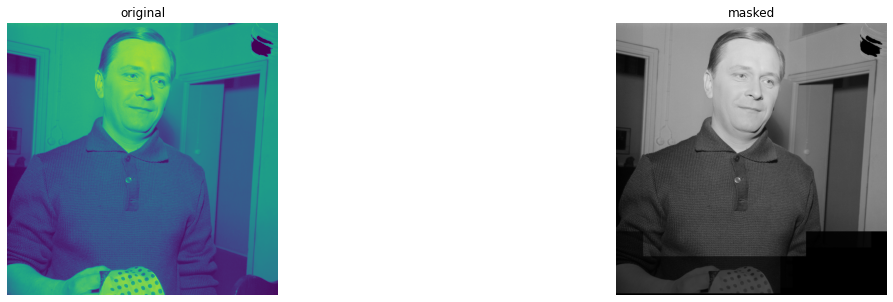

In [177]:
#kvqa tiny ebert

True Label,Predicted Label,Attribution Label,Attribution Score,Word Importance
0,0 (0.00),0,0.00,was the person in the image born after the end of world war ii ? joke ##la in 1961


Question 13718_2 Was the person in the image born after the end of World War II? Jokela in 1961
TRUE ANSWER: No PREDICTED:  No Top 1 / 5 Correct? 1 1
Top 5 answers: ['No', 'Yes', 'Person in the right', 'NA', 'Person in the left']
Top 5 probs: [3.9357, -3.9963, -12.0127, -12.2548, -12.3281]


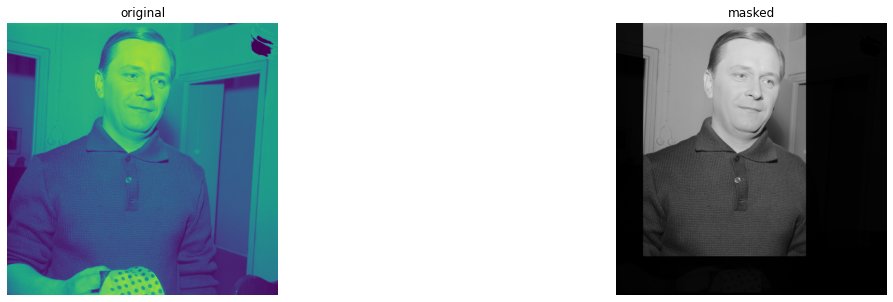

In [171]:
# kvqa tiny with captions

True Label,Predicted Label,Attribution Label,Attribution Score,Word Importance
0,0 (0.00),0,0.00,was the person in the image born after the end of world war ii ?


Question 13718_2 Was the person in the image born after the end of World War II?
TRUE ANSWER: No PREDICTED:  No Top 1 / 5 Correct? 1 1
Top 5 answers: ['No', 'Yes', 'NA', '1', 'Person in the right']
Top 5 probs: [2.2545, -2.1486, -10.8765, -11.3976, -11.5096]


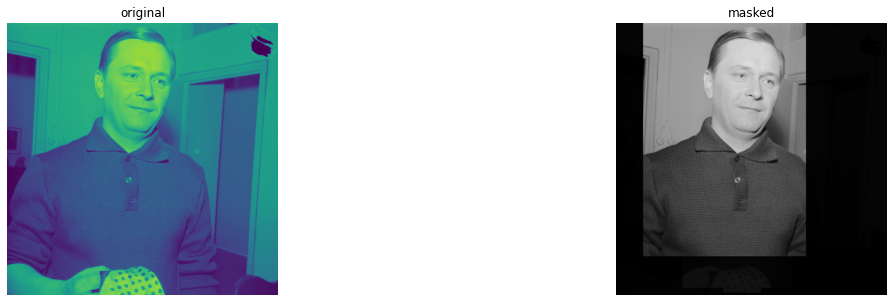

In [166]:
#kvqa tiny plain

In [ ]:
# FOR TINY DEBUG


""" KVQA tiny plain 
Correct:  273 out of 618 =  0.441747572815534
Incorrect but in Top 5:  118 out of 618 =  0.19093851132686085
Incorrect:  227 out of 618 =  0.3673139158576052
"""

""" KVQA tiny captions
Correct:  282 out of 618 =  0.4563106796116505
Incorrect but in Top 5:  112 out of 618 =  0.18122977346278318
Incorrect:  224 out of 618 =  0.36245954692556637
"""
""" KVQA tiny ebert 
Correct:  284 out of 618 =  0.459546925566343
Incorrect but in Top 5:  116 out of 618 =  0.18770226537216828
Incorrect:  218 out of 618 =  0.35275080906148865
"""




""" KVQA PLAIN tiny
Unique imgs: 98
Num all right:  0 0.0
Num all top1 and top5:  0 0.0
Num all top5 and wrong:  2 0.02040816326530612
Num all wrong:  0 0.0
Num mixed:  96 0.9795918367346939
{'top1': 2, 'top5': 1, 'neither': 2, 'keys': ['14251_0', '14251_1', '14251_2', '14251_3', '14251_4']} 1
14251_0 
	 Who is the person in the image? 
	 Jan Klusák ---> ['Vladimir Putin', 'Yes', 'Silvio Berlusconi', 'Person in the left', 'Person in the right']
	 0 0
14251_1 
	 Was the person in the image born after the end of World War II? 
	 No ---> ['Yes', 'No', 'NA', '2', '1']
	 0 1
14251_2 
	 In which country was the person in the image born? 
	 Czech Republic ---> ['Germany', 'United Kingdom', 'Spain', 'Netherlands', 'Russia']
	 0 0
14251_3 
	 In which continent was the person in the image born? 
	 Europe ---> ['Europe', 'Africa', 'South America', 'Asia', 'North America']
	 1 1
14251_4 
	 Is the person in the image an actor? 
	 No ---> ['No', 'Yes', 'NA', 'Person in the right', '1']
	 1 1
"""

""" KVQA CAPT tiny
Unique imgs: 98
Num all right:  0 0.0
Num all top1 and top5:  1 0.01020408163265306
Num all top5 and wrong:  3 0.030612244897959183
Num all wrong:  1 0.01020408163265306
Num mixed:  93 0.9489795918367347
{'top1': 2, 'top5': 1, 'neither': 2, 'keys': ['14251_0', '14251_1', '14251_2', '14251_3', '14251_4']} 1
14251_0 
	 Who is the person in the image? Jan Klusák in Karlovy Vary (2009) 
	 Jan Klusák ---> ['Yes', 'Person in the left', 'Asia', 'Person in the right', 'Silvio Berlusconi']
	 0 0
14251_1 
	 Was the person in the image born after the end of World War II? Jan Klusák in Karlovy Vary (2009) 
	 No ---> ['Yes', 'No', 'Person in the right', 'Both', 'Person in the left']
	 0 1
14251_2 
	 In which country was the person in the image born? Jan Klusák in Karlovy Vary (2009) 
	 Czech Republic ---> ['Russia', 'Italy', 'Poland', 'Germany', 'Netherlands']
	 0 0
14251_3 
	 In which continent was the person in the image born? Jan Klusák in Karlovy Vary (2009) 
	 Europe ---> ['Europe', 'Africa', 'South America', 'Asia', 'Oceania']
	 1 1
14251_4 
	 Is the person in the image an actor? Jan Klusák in Karlovy Vary (2009) 
	 No ---> ['No', 'Yes', 'Person in the right', 'Person in the left', 'Africa']
	 1 1
"""
    
""" KVQA EBERT tiny
Unique imgs: 98
Num all right:  0 0.0
Num all top1 and top5:  0 0.0
Num all top5 and wrong:  1 0.01020408163265306
Num all wrong:  0 0.0
Num mixed:  97 0.9897959183673469
{'top1': 2, 'top5': 1, 'neither': 2, 'keys': ['14251_0', '14251_1', '14251_2', '14251_3', '14251_4']} 1
14251_0 
	 Who is the person in the image? Jan Klusák in Karlovy Vary (2009) 
	 Jan Klusák ---> ['No', 'Silvio Berlusconi', 'Vladimir Putin', 'Yes', 'Helmut Kohl']
	 0 0
14251_1 
	 Was the person in the image born after the end of World War II? Jan Klusák in Karlovy Vary (2009) 
	 No ---> ['Yes', 'No', 'Person in the right', 'NA', 'South America']
	 0 1
14251_2 
	 In which country was the person in the image born? Jan Klusák in Karlovy Vary (2009) 
	 Czech Republic ---> ['Netherlands', 'Italy', 'Poland', 'Norway', 'Greece']
	 0 0
14251_3 
	 In which continent was the person in the image born? Jan Klusák in Karlovy Vary (2009) 
	 Europe ---> ['Europe', 'Africa', 'Asia', 'South America', 'North America']
	 1 1
14251_4 
	 Is the person in the image an actor? Jan Klusák in Karlovy Vary (2009) 
	 No ---> ['No', 'Yes', 'Person in the right', 'Person in the left', 'Europe']
	 1 1
"""
print()

In [ ]:
#TINY Analysis
"""KVQA PLAIN
1 509 252 0.4951 86 0.169 171 0.336
5 109 21 0.1927 32 0.2936 56 0.5138
{'top1': 3, 'top5': 7, 'neither': 7, 'keys': ['1223_0', '1223_1', '1223_2', '1223_3', '1223_4', '1223_5', '1223_6', '1223_7', '1223_8', '1223_9', '1223_10', '1223_11', '1223_12', '1223_13', '1223_14', '1223_15', '1223_16']}
1223_0 
	 Who is in the left? 
	 Tony Blair ---> ['Vladimir Putin', 'Michelle Obama', 'Barack Obama', 'Dmitry Medvedev', 'Luiz Inácio Lula da Silva']
	 0 0 [-3.41769, -3.5859, -3.62485, -3.8048, -4.40766]
	 Low Confidence so skip
1223_1 
	 Who is in the right? 
	 Catherine Ashton ---> ['Vladimir Putin', 'Michelle Obama', 'Barack Obama', 'Dmitry Medvedev', 'Luiz Inácio Lula da Silva']
	 0 0 [-3.42348, -3.68345, -3.74375, -3.83059, -4.41816]
	 Low Confidence so skip
1223_2 
	 Who is second from left? 
	 Hillary Clinton ---> ['Vladimir Putin', 'Michelle Obama', 'Barack Obama', 'Dmitry Medvedev', 'Luiz Inácio Lula da Silva']
	 0 0 [-3.35801, -3.46817, -3.55198, -3.7078, -4.38009]
	 Low Confidence so skip
1223_3 
	 Who is second from right? 
	 Sergey Lavrov ---> ['Vladimir Putin', 'Michelle Obama', 'Barack Obama', 'Dmitry Medvedev', 'Luiz Inácio Lula da Silva']
	 0 0 [-3.35238, -3.53258, -3.60616, -3.71881, -4.37559]
	 Low Confidence so skip
1223_4 
	 Who is in the center? 
	 Ban Ki-moon ---> ['NA', '3', '4', '5', 'Person second from left']
	 0 0 [-0.74115, -3.7599, -3.93436, -4.04953, -4.18479]
	 Borderline
1223_5 
	 Who is to the left of Tony Blair? 
	 Hillary Clinton ---> ['Michelle Obama', 'Vladimir Putin', 'Barack Obama', 'Dmitry Medvedev', 'Luiz Inácio Lula da Silva']
	 0 0 [-3.27157, -3.27559, -3.35491, -3.64742, -4.32051]
	 Low Confidence so skip
1223_6 
	 Who is to the right of Sergey Lavrov? 
	 Ban Ki-moon ---> ['Vladimir Putin', 'Michelle Obama', 'Barack Obama', 'Dmitry Medvedev', 'Luiz Inácio Lula da Silva']
	 0 0 [-3.20448, -3.40086, -3.46449, -3.58935, -4.27076]
	 Low Confidence so skip
1223_7 
	 How many people in the image were born after the end of World War II? 
	 4 ---> ['3', '4', '2', '5', '1']
	 0 1 [-0.07392, -1.48232, -1.50692, -2.80067, -2.85357]
	 Borderline
1223_8 
	 How many people in this image were born in United Kingdom? 
	 2 ---> ['3', '2', '1', '4', 'NA']
	 0 1 [-0.52843, -0.8332, -0.83327, -2.6328, -3.33544]
	 Borderline
1223_9 
	 Were all the people in the image born in the same country? 
	 No ---> ['No', 'Yes', 'NA', '3', '4']
	 1 1 [0.1772, -1.00826, -3.08371, -6.64204, -7.69357]
	 High Confidence
1223_10 
	 How many people in this image were born in Europe? 
	 3 ---> ['3', '2', '4', '1', '5']
	 1 1 [0.09283, -1.40724, -1.75688, -2.46004, -2.84652]
	 High Confidence
1223_11 
	 Were all the people in the image born in the same continent? 
	 No ---> ['Yes', 'No', 'NA', '3', '2']
	 0 1 [0.42461, -0.84877, -2.69268, -6.313, -7.62564]
	 High Confidence
1223_12 
	 Who among the people in the image studied at the John F. Kennedy School of Government? 
	 Person in the center ---> ['Person in the left', 'Person in the right', 'Person in the center', 'Person second from left', 'person in the left']
	 0 1 [-0.69344, -1.2813, -2.25914, -3.48167, -3.52385]
	 Borderline
1223_13 
	 Who among the people in the image ever married to Maria Lavrova? 
	 Person in the right ---> ['Person in the center', 'Person in the left', 'Person in the right', 'Person second from left', 'person in the center']
	 0 1 [-1.35638, -1.45136, -1.91996, -1.97171, -2.45205]
	 Low Confidence so skip
1223_14 
	 Who is the founder of the political party to which person second from right belongs to? 
	 Vladimir Lenin ---> ['NA', 'Andrew Jackson', 'Abraham Lincoln', 'Vladimir Lenin', 'Chen Duxiu']
	 0 1 [-0.48397, -1.12148, -1.74263, -3.37462, -3.5242]
	 Borderline
1223_15 
	 How many politicians are there in the image? 
	 5 ---> ['3', '2', '4', '1', '5']
	 0 1 [0.38892, -1.52401, -1.54505, -2.60832, -2.67165]
	 High Confidence
1223_16 
	 Do all the people in the image have a common occupation? 
	 Yes ---> ['Yes', 'No', 'NA', '3', '1']
	 1 1 [0.24882, -0.37655, -7.41912, -10.27519, -10.3384]
	 High Confidence
Normal ACC: 3 / 17 = 0.1765
Counter ACC: 3 / 10 = 0.3
"""

""" KVQA CAPT
1 509 257 0.5049 84 0.165 168 0.3301
5 109 25 0.2294 28 0.2569 56 0.5138
{'top1': 6, 'top5': 4, 'neither': 7, 'keys': ['1223_0', '1223_1', '1223_2', '1223_3', '1223_4', '1223_5', '1223_6', '1223_7', '1223_8', '1223_9', '1223_10', '1223_11', '1223_12', '1223_13', '1223_14', '1223_15', '1223_16']}
1223_0 
	 Who is in the left? Ashton (far right) with the rest of the Quartet on the Middle East (2010) 
	 Tony Blair ---> ['Barack Obama', 'Michelle Obama', 'George W. Bush', 'Donald Trump', 'Bill Clinton']
	 0 0 [-1.81999, -2.56656, -3.23388, -3.84698, -4.19461]
	 Low Confidence so skip
1223_1 
	 Who is in the right? Ashton (far right) with the rest of the Quartet on the Middle East (2010) 
	 Catherine Ashton ---> ['Barack Obama', 'Michelle Obama', 'George W. Bush', 'Donald Trump', 'Bill Clinton']
	 0 0 [-1.85485, -2.56987, -3.25675, -3.86284, -4.24664]
	 Low Confidence so skip
1223_2 
	 Who is second from left? Ashton (far right) with the rest of the Quartet on the Middle East (2010) 
	 Hillary Clinton ---> ['Barack Obama', 'Michelle Obama', 'George W. Bush', 'Donald Trump', 'Bill Clinton']
	 0 0 [-1.84037, -2.58404, -3.22032, -3.8922, -4.19177]
	 Low Confidence so skip
1223_3 
	 Who is second from right? Ashton (far right) with the rest of the Quartet on the Middle East (2010) 
	 Sergey Lavrov ---> ['Barack Obama', 'Michelle Obama', 'George W. Bush', 'Donald Trump', 'Bill Clinton']
	 0 0 [-1.84738, -2.56219, -3.23055, -3.89366, -4.22647]
	 Low Confidence so skip
1223_4 
	 Who is in the center? Ashton (far right) with the rest of the Quartet on the Middle East (2010) 
	 Ban Ki-moon ---> ['Barack Obama', 'Michelle Obama', 'George W. Bush', 'Donald Trump', 'Bill Clinton']
	 0 0 [-1.76898, -2.5047, -3.21758, -3.81585, -4.0968]
	 Low Confidence so skip
1223_5 
	 Who is to the left of Tony Blair? Ashton (far right) with the rest of the Quartet on the Middle East (2010) 
	 Hillary Clinton ---> ['Barack Obama', 'Michelle Obama', 'George W. Bush', 'Donald Trump', 'Bill Clinton']
	 0 0 [-1.78821, -2.52696, -3.24082, -3.86283, -4.20164]
	 Low Confidence so skip
1223_6 
	 Who is to the right of Sergey Lavrov? Ashton (far right) with the rest of the Quartet on the Middle East (2010) 
	 Ban Ki-moon ---> ['Barack Obama', 'Michelle Obama', 'Vladimir Putin', 'George W. Bush', 'Dmitry Medvedev']
	 0 0 [-2.51526, -2.88515, -3.4405, -3.72444, -3.8523]
	 Low Confidence so skip
1223_7 
	 How many people in the image were born after the end of World War II? Ashton (far right) with the rest of the Quartet on the Middle East (2010) 
	 4 ---> ['3', '4', '2', '5', '1']
	 0 1 [-0.51846, -0.8115, -1.54962, -1.89187, -2.59656]
	 Borderline
1223_8 
	 How many people in this image were born in United Kingdom? Ashton (far right) with the rest of the Quartet on the Middle East (2010) 
	 2 ---> ['2', '3', '1', '4', '5']
	 1 1 [-0.42276, -0.83977, -1.24686, -2.68349, -3.63861]
	 Borderline
1223_9 
	 Were all the people in the image born in the same country? Ashton (far right) with the rest of the Quartet on the Middle East (2010) 
	 No ---> ['No', 'Yes', 'NA', '3', '5']
	 1 1 [1.99195, -1.74858, -5.35177, -9.21673, -10.25769]
	 High Confidence
1223_10 
	 How many people in this image were born in Europe? Ashton (far right) with the rest of the Quartet on the Middle East (2010) 
	 3 ---> ['3', '2', '4', '1', '5']
	 1 1 [-0.12795, -1.17947, -1.87044, -2.1579, -2.89112]
	 Borderline
1223_11 
	 Were all the people in the image born in the same continent? Ashton (far right) with the rest of the Quartet on the Middle East (2010) 
	 No ---> ['No', 'Yes', 'NA', '3', '4']
	 1 1 [0.8653, -0.74687, -4.1456, -7.51772, -8.76059]
	 High Confidence
1223_12 
	 Who among the people in the image studied at the John F. Kennedy School of Government? Ashton (far right) with the rest of the Quartet on the Middle East (2010) 
	 Person in the center ---> ['Person in the center', 'Person in the left', 'Person in the right', 'NA', 'person in the right']
	 1 1 [-1.21076, -1.55505, -1.87057, -2.28213, -2.47762]
	 Low Confidence so skip
1223_13 
	 Who among the people in the image ever married to Maria Lavrova? Ashton (far right) with the rest of the Quartet on the Middle East (2010) 
	 Person in the right ---> ['Person in the center', 'Person in the left', 'Person in the right', 'person in the center', 'Person second from left']
	 0 1 [-0.74099, -1.69754, -1.94546, -2.00309, -2.07234]
	 Borderline
1223_14 
	 Who is the founder of the political party to which person second from right belongs to? Ashton (far right) with the rest of the Quartet on the Middle East (2010) 
	 Vladimir Lenin ---> ['NA', 'Andrew Jackson', 'Abraham Lincoln', 'Chen Duxiu', 'Vladimir Lenin']
	 0 1 [0.46881, -0.75475, -1.68972, -3.79662, -4.26413]
	 High Confidence
1223_15 
	 How many politicians are there in the image? Ashton (far right) with the rest of the Quartet on the Middle East (2010) 
	 5 ---> ['3', '4', '2', '1', '5']
	 0 1 [0.15181, -1.20396, -1.28588, -1.78782, -2.19028]
	 High Confidence
1223_16 
	 Do all the people in the image have a common occupation? Ashton (far right) with the rest of the Quartet on the Middle East (2010) 
	 Yes ---> ['Yes', 'No', 'NA', '3', '2']
	 1 1 [0.58616, -0.47876, -5.42109, -7.62691, -8.51493]
	 High Confidence
Normal ACC: 6 / 17 = 0.3529
Counter ACC: 5 / 9 = 0.5556
"""

"""KVQA EBERT
1 509 262 0.5147 83 0.1631 164 0.3222
5 109 22 0.2018 33 0.3028 54 0.4954
{'top1': 4, 'top5': 5, 'neither': 8, 'keys': ['1223_0', '1223_1', '1223_2', '1223_3', '1223_4', '1223_5', '1223_6', '1223_7', '1223_8', '1223_9', '1223_10', '1223_11', '1223_12', '1223_13', '1223_14', '1223_15', '1223_16']}

1223_0 
	 Who is in the left? Sergey Lavrov Ban Ki-moon Hillary Clinton Tony Blair Ashton (far right) with the rest of the Quartet on the Middle East (2010) 
	 Tony Blair ---> ['Michelle Obama', 'Barack Obama', 'Dilma Rousseff', 'Dmitry Medvedev', 'Hillary Clinton']
	 0 0 [-2.38269, -3.02853, -3.66965, -3.83602, -3.83728]
	 Low Confidence so skip
1223_1 
	 Who is in the right? Sergey Lavrov Ban Ki-moon Hillary Clinton Tony Blair Ashton (far right) with the rest of the Quartet on the Middle East (2010) 
	 Catherine Ashton ---> ['Michelle Obama', 'Barack Obama', 'Dilma Rousseff', 'Dmitry Medvedev', 'Hillary Clinton']
	 0 0 [-2.39974, -3.05469, -3.64891, -3.80952, -3.82574]
	 Low Confidence so skip
1223_2 
	 Who is second from left? Sergey Lavrov Ban Ki-moon Hillary Clinton Tony Blair Ashton (far right) with the rest of the Quartet on the Middle East (2010) 
	 Hillary Clinton ---> ['Michelle Obama', 'Barack Obama', 'Dilma Rousseff', 'Dmitry Medvedev', 'Vladimir Putin']
	 0 0 [-2.51752, -3.1764, -3.55589, -3.66073, -3.78044]
	 Low Confidence so skip
1223_3 
	 Who is second from right? Sergey Lavrov Ban Ki-moon Hillary Clinton Tony Blair Ashton (far right) with the rest of the Quartet on the Middle East (2010) 
	 Sergey Lavrov ---> ['Michelle Obama', 'Barack Obama', 'Dilma Rousseff', 'Dmitry Medvedev', 'Vladimir Putin']
	 0 0 [-2.59016, -3.2381, -3.55513, -3.7128, -3.81849]
	 Low Confidence so skip
1223_4 
	 Who is in the center? Sergey Lavrov Ban Ki-moon Hillary Clinton Tony Blair Ashton (far right) with the rest of the Quartet on the Middle East (2010) 
	 Ban Ki-moon ---> ['Michelle Obama', 'Barack Obama', 'Dilma Rousseff', 'Dmitry Medvedev', 'Hillary Clinton']
	 0 0 [-2.44266, -3.06019, -3.69739, -3.83994, -3.87001]
	 Low Confidence so skip
1223_5 
	 Who is to the left of Tony Blair? Sergey Lavrov Ban Ki-moon Hillary Clinton Tony Blair Ashton (far right) with the rest of the Quartet on the Middle East (2010) 
	 Hillary Clinton ---> ['Michelle Obama', 'Barack Obama', 'Dilma Rousseff', 'Dmitry Medvedev', 'Vladimir Putin']
	 0 0 [-2.55302, -3.15207, -3.60602, -3.69378, -3.78651]
	 Low Confidence so skip
1223_6 
	 Who is to the right of Sergey Lavrov? Sergey Lavrov Ban Ki-moon Hillary Clinton Tony Blair Ashton (far right) with the rest of the Quartet on the Middle East (2010) 
	 Ban Ki-moon ---> ['Michelle Obama', 'Barack Obama', 'Dilma Rousseff', 'Dmitry Medvedev', 'Vladimir Putin']
	 0 0 [-2.51559, -3.1537, -3.64184, -3.70192, -3.81158]
	 Low Confidence so skip
1223_7 
	 How many people in the image were born after the end of World War II? Sergey Lavrov Ban Ki-moon Hillary Clinton Tony Blair Ashton (far right) with the rest of the Quartet on the Middle East (2010) 
	 4 ---> ['3', '4', '5', '2', '1']
	 0 1 [-0.32015, -0.71387, -1.50156, -2.4119, -4.08788]
	 Borderline
1223_8 
	 How many people in this image were born in United Kingdom? Sergey Lavrov Ban Ki-moon Hillary Clinton Tony Blair Ashton (far right) with the rest of the Quartet on the Middle East (2010) 
	 2 ---> ['2', '3', '1', '4', '5']
	 1 1 [-0.84891, -1.05377, -1.46219, -1.60587, -2.76914]
	 Borderline
1223_9 
	 Were all the people in the image born in the same country? Sergey Lavrov Ban Ki-moon Hillary Clinton Tony Blair Ashton (far right) with the rest of the Quartet on the Middle East (2010) 
	 No ---> ['No', 'Yes', 'NA', 'Chen Duxiu', 'Dadabhai Naoroji']
	 1 1 [2.89103, -3.44299, -3.78116, -8.86127, -8.97348]
	 High Confidence
1223_10 
	 How many people in this image were born in Europe? Sergey Lavrov Ban Ki-moon Hillary Clinton Tony Blair Ashton (far right) with the rest of the Quartet on the Middle East (2010) 
	 3 ---> ['4', '5', '3', '2', '1']
	 0 1 [-0.38204, -0.80588, -0.90252, -1.99367, -2.41189]
	 Borderline
1223_11 
	 Were all the people in the image born in the same continent? Sergey Lavrov Ban Ki-moon Hillary Clinton Tony Blair Ashton (far right) with the rest of the Quartet on the Middle East (2010) 
	 No ---> ['No', 'Yes', 'NA', 'Chen Duxiu', 'Dadabhai Naoroji']
	 1 1 [1.29287, -1.68926, -2.86389, -8.2245, -8.41215]
	 High Confidence
1223_12 
	 Who among the people in the image studied at the John F. Kennedy School of Government? Sergey Lavrov Ban Ki-moon Hillary Clinton Tony Blair Ashton (far right) with the rest of the Quartet on the Middle East (2010) 
	 Person in the center ---> ['Person in the center', 'Person in the left', 'Person in the right', 'Person second from left', 'person in the center']
	 1 1 [-0.81396, -1.63612, -1.81559, -1.94838, -2.03408]
	 Borderline
1223_13 
	 Who among the people in the image ever married to Maria Lavrova? Sergey Lavrov Ban Ki-moon Hillary Clinton Tony Blair Ashton (far right) with the rest of the Quartet on the Middle East (2010) 
	 Person in the right ---> ['Person in the center', 'Person second from left', 'person in the center', 'Person in the left', 'person in the right']
	 0 0 [-0.97903, -1.67197, -1.83027, -2.10124, -2.16311]
	 Borderline
1223_14 
	 Who is the founder of the political party to which person second from right belongs to? Sergey Lavrov Ban Ki-moon Hillary Clinton Tony Blair Ashton (far right) with the rest of the Quartet on the Middle East (2010) 
	 Vladimir Lenin ---> ['NA', 'Andrew Jackson', 'Abraham Lincoln', 'Chen Duxiu', 'Vladimir Lenin']
	 0 1 [-0.25186, -1.7998, -2.8758, -3.17296, -3.52446]
	 Borderline
1223_15 
	 How many politicians are there in the image? Sergey Lavrov Ban Ki-moon Hillary Clinton Tony Blair Ashton (far right) with the rest of the Quartet on the Middle East (2010) 
	 5 ---> ['3', '4', '5', '2', '1']
	 0 1 [0.14244, -0.54599, -1.35502, -2.77239, -3.61289]
	 High Confidence
1223_16 
	 Do all the people in the image have a common occupation? Sergey Lavrov Ban Ki-moon Hillary Clinton Tony Blair Ashton (far right) with the rest of the Quartet on the Middle East (2010) 
	 Yes ---> ['No', 'Yes', 'NA', '3', '4']
	 0 1 [0.97329, -1.16561, -4.29768, -9.75835, -9.80905]
	 High Confidence
Normal ACC: 4 / 17 = 0.2353
Counter ACC: 4 / 10 = 0.4
"""
print()

In [ ]:
# tiny numbers
""" KVQA PLAIN
no question type for  68 out of  183007

1-hop
correct 211
total 495
Multi-Relation {'correct': 119, 'total': 262, 'pct': 0.4542}
boolean {'correct': 155, 'total': 186, 'pct': 0.8333}
comparison {'correct': 79, 'total': 89, 'pct': 0.8876}
Multi-Entity {'correct': 88, 'total': 107, 'pct': 0.8224}
subtraction {'correct': 3, 'total': 43, 'pct': 0.0698}
counting {'correct': 9, 'total': 14, 'pct': 0.6429}
spatial {'correct': 0, 'total': 49, 'pct': 0.0}
intersection {'correct': 6, 'total': 7, 'pct': 0.8571}
pct 0.4263

multi-hop
correct 62
total 123
Multi-Relation {'correct': 61, 'total': 122, 'pct': 0.5}
counting {'correct': 5, 'total': 16, 'pct': 0.3125}
Multi-Entity {'correct': 12, 'total': 27, 'pct': 0.4444}
intersection {'correct': 3, 'total': 5, 'pct': 0.6}
boolean {'correct': 6, 'total': 10, 'pct': 0.6}
1-hop counting {'correct': 1, 'total': 1, 'pct': 1.0}
pct 0.5041
"""

""" KVQA CAPT
1-hop
correct 210
total 495
Multi-Relation {'correct': 123, 'total': 262, 'pct': 0.4695}
boolean {'correct': 155, 'total': 186, 'pct': 0.8333}
comparison {'correct': 84, 'total': 89, 'pct': 0.9438}
Multi-Entity {'correct': 92, 'total': 107, 'pct': 0.8598}
subtraction {'correct': 1, 'total': 43, 'pct': 0.0233}
counting {'correct': 9, 'total': 14, 'pct': 0.6429}
spatial {'correct': 0, 'total': 49, 'pct': 0.0}
intersection {'correct': 6, 'total': 7, 'pct': 0.8571}
pct 0.4242

multi-hop
correct 72
total 123
Multi-Relation {'correct': 71, 'total': 122, 'pct': 0.582}
counting {'correct': 6, 'total': 16, 'pct': 0.375}
Multi-Entity {'correct': 15, 'total': 27, 'pct': 0.5556}
intersection {'correct': 4, 'total': 5, 'pct': 0.8}
boolean {'correct': 8, 'total': 10, 'pct': 0.8}
1-hop counting {'correct': 1, 'total': 1, 'pct': 1.0}
pct 0.5854
"""
        
""" KVQA EBERT
no question type for  68 out of  183007

1-hop
correct 215
total 495
Multi-Relation {'correct': 114, 'total': 262, 'pct': 0.4351}
boolean {'correct': 164, 'total': 186, 'pct': 0.8817}
comparison {'correct': 80, 'total': 89, 'pct': 0.8989}
Multi-Entity {'correct': 87, 'total': 107, 'pct': 0.8131}
subtraction {'correct': 2, 'total': 43, 'pct': 0.0465}
counting {'correct': 8, 'total': 14, 'pct': 0.5714}
spatial {'correct': 0, 'total': 49, 'pct': 0.0}
intersection {'correct': 6, 'total': 7, 'pct': 0.8571}
pct 0.4343

multi-hop
correct 69
total 123
Multi-Relation {'correct': 69, 'total': 122, 'pct': 0.5656}
counting {'correct': 6, 'total': 16, 'pct': 0.375}
Multi-Entity {'correct': 13, 'total': 27, 'pct': 0.4815}
intersection {'correct': 4, 'total': 5, 'pct': 0.8}
boolean {'correct': 7, 'total': 10, 'pct': 0.7}
1-hop counting {'correct': 0, 'total': 1, 'pct': 0.0}
pct 0.561
"""

In [61]:
!%pwd

/home/diego/adv_comp_viz21/lxmert/orig_code/lxmert_gen/Transformer-MM-Explainability-main


In [ ]:
import json
#  lxmert_gen/Transformer-MM-Explainability-main
with open("kvqa_dataset_with_entity_info_and_ref_imgs_v6cum.json","r") as f:
    kvqa_qs = json.load(f)

entity_spans_dict = json.load(open("/home/diego/adv_comp_viz21/lxmert/orig_code/lxmert/data/kvqa/new_kvqa_q_caps_ents0502.json"))
print(len(entity_spans_dict))  #24602
print(len(kvqa_qs))

24602
24602


In [405]:
# use spacy / wikipedia/ wiki_emb  etc to get 4 ent spans from question + caption in kvqa_qs
import os
os.chdir(f'../src/')

from lxrt.entry import load_wiki_embeddings
wiki_emb = load_wiki_embeddings()

os.chdir(f'../Transformer-MM-Explainability-main/')

import wikipedia
print(wikipedia.search("battery"))

Loading  /data/diego/adv_comp_viz21/ebert-master/resources/wikipedia2vec/wikipedia2vec-base-cased
['Battery', 'Electric battery', 'Lithium-ion battery', 'List of battery sizes', 'The Battery', 'Alkaline battery', 'Artillery battery', 'List of battery types', 'Assault and battery', 'Battery (crime)']


In [410]:
kvqa_qs['21717']['wikiCap']

'Francis Condon in the early 20th Century'

In [423]:
def filter_nouns(doc, tags=['NOUN','PROPN']):
            
    output = [[tok.string.strip(), tok.idx, tok.idx + len(tok.string.strip())] for tok in doc if tok.pos_ in tags]
    # include years
    for tok in doc:
        if tok.pos_ == 'NUM' and len(tok.string.strip()) == 4:
            output += [[tok.string.strip(), tok.idx, tok.idx + len(tok.string.strip())]]
    return output

def filter_verbs(doc, tags=['VERB']):
    output = [[tok.string.strip(), tok.idx, tok.idx + len(tok.string.strip())] for tok in doc if tok.pos_ in tags and not tok.lemma_[0].isupper()]
    return output

def filter_noun_phrases(sentence, doc, debug = False, tags=['NOUN','PROPN']):
    res = []
    for chunk in doc.noun_chunks:          
        ebeg = chunk.start
        eend = chunk.end 
        if debug:
            print("\n\tCur chunk", chunk.string.strip(), ebeg, eend, chunk.start_char, chunk.end_char)            
            print("\t",[ (tok, tok.pos_, tok.dep_, tok.tag_) for tok in nlp(chunk.string)])           
            """
           	1. Cur chunk Which american president 0 3 0 24
            	 [(Which, 'DET', 'det', 'WDT'), (american, 'ADJ', 'amod', 'JJ'), (president, 'NOUN', 'ROOT', 'NN')]
            	add cur [['president', 15, 24]] 0 3

            2. Cur chunk the stuffed animal 7 10 49 67
            	 [(the, 'DET', 'det', 'DT'), (stuffed, 'VERB', 'amod', 'VBN'), (animal, 'NOUN', 'ROOT', 'NN')]
            	add cur [['animal', 12, 18]] 7 10 
                
            3. [                           (sporting, 'VERB', 'compound', 'VBG'), (equipment, 'NOUN', 'ROOT', 'NN')]
            """
               
        possible = [ (tok.string.strip(), tok.idx, tok.idx + len(tok.string.strip()), tok.pos_, tok.dep_, tok.tag_) for tok in nlp(chunk.string)]
        cur = []
        if len(possible) == 1 and possible[0][5] in tags:
            cur = [possible[0], possible[1], possible[2]]
        elif len(possible) > 1:
            if possible[0][4] == 'det':
                # remove determiner and then look at phrase
                possible = possible[1:]
                
            if len(possible) == 1 and possible[0][5] in tags:
                cur = [possible[0], possible[1], possible[2]]
            elif len(possible) > 1:
                #w1, w2 = 0, 1
                w1, w2 = len(possible) - 2, len(possible) - 1  
                cond1 = (possible[w1][4] in ['amod','compound'] and possible[w1][3] in ['ADJ','VERB'])
                cond2 = (possible[w2][3] == 'NOUN' and possible[w2][4] == 'ROOT')
                if cond1 and cond2:
                    cur = [[p[0], p[1], p[2]] for p in possible]

        # this prior filters list so it only contains NOUNS, or PROPN.. default if the cases we look for above aren't met
        if cur == []:
            cur = [[tok.string.strip(), tok.idx, tok.idx + len(tok.string.strip())] for tok in nlp(chunk.string) if tok.pos_ in tags]
        
        if cur != []:           
            if debug:
                print("\tadd cur",cur, ebeg, eend)
            all_toks = [c[0] for c in cur] 
            all_toks_str = " ".join(all_toks)   
            try:
                char_begin = sentence.index(all_toks_str)
                char_end = char_begin + len(all_toks_str)  
            except Exception as e:
                if debug:
                    print("Error with ",all_toks_str," in ",sentence)
                char_begin = sentence.index(all_toks[0])
                char_end = sentence.index(all_toks[-1]) + len(all_toks[-1])
                all_toks_str = sentence[char_begin:char_end]  
                if debug:
                    print("\tAFTER: ",all_toks_str)
            res.append([all_toks_str,char_begin, char_end]) 
    return res

import spacy
import time

nlp = spacy.load('en_core_web_sm') 
st = time.time()

ents_per_q = []
interest_words = []
toshow = -1
for i, qid in enumerate(kvqa_qs):
    if i > toshow and toshow != -1:
        break
    cur = kvqa_qs[qid]
    sentence = cur['wikiCap']
    
    doc = nlp(sentence)
    nouns = filter_nouns(doc)
    verbs = filter_verbs(doc)
    root = [[tok.string.strip(), tok.idx, tok.idx + len(tok.string.strip())] for tok in doc if tok.dep_ == "ROOT" ]
    
    debug = False
    
    if i < toshow: #in [7,9]:
        debug = True
        print("\n", i, sentence)
        
        #print(dir(doc))
    
    cur_ents = filter_noun_phrases(sentence, doc, debug)
    
    if i < toshow: #in [7,9]:
        print("\nCur ents", cur_ents)

    
    #add nouns
    for w in nouns:
        found = False
        for np in cur_ents:
            if w[0] in np[0]:
                found = True
        if not found:
            #print("add noun",w)
            cur_ents.append(w)

    #add verbs
    for w in verbs:
        found = False
        for np in cur_ents:
            if w[0] in np[0]:
                found = True
        if not found:
            #print("add verb",w)
            cur_ents.append(w)

    #add ROOT if missed ( to catch Bourchier as Macbeth, 1910 )   
    for w in root:
        found = False
        for np in cur_ents:
            if w[0] in np[0]:
                found = True
        if not found:
            #print("add verb",w)
            cur_ents.append(w)
    
    ents_per_q.append(cur_ents)

  
    i += 1

print("")
qkeys = list(kvqa_qs.keys())
toshow_below = 50
for i in range(len(ents_per_q)):
    if i < toshow_below:
        print(i, qkeys[i], kvqa_qs[qkeys[i]]['wikiCap'], ents_per_q[i])    
    
print("Elapsed:", time.time() - st)   #Elapsed: 1051


0 21717 Francis Condon in the early 20th Century [['Francis Condon', 0, 14], ['early 20th Century', 22, 40]]
1 24345 Michael Steele in June 2016. [['Michael Steele', 0, 14], ['June', 18, 22], ['2016', 23, 27]]
2 30218 Liu Mingkang [['Liu Mingkang', 0, 12]]
3 18778 Bourchier as Macbeth, 1910 [['Macbeth', 13, 20], ['1910', 22, 26], ['Bourchier', 0, 9]]
4 45472 Najib with President Susilo Bambang Yudhoyono in Putrajaya on 18 December 2012. [['Najib', 0, 5], ['President Susilo Bambang Yudhoyono', 11, 45], ['Putrajaya', 49, 58], ['December', 65, 73], ['2012', 74, 78]]
5 14657 Elsie de Wolfe, James Hazen Hyde Ball, January 31, 1905 [['Elsie de Wolfe', 0, 14], ['James Hazen Hyde Ball', 16, 37], ['January', 39, 46], ['1905', 51, 55]]
6 43793 Chaliapin and Tornagi [['Chaliapin', 0, 9], ['Tornagi', 14, 21]]
7 15509 Bono at the 2012 GLAAD Awards [['GLAAD Awards', 17, 29], ['Bono', 0, 4], ['2012', 12, 16]]
8 22511 Henry Labouchère [['Henry Labouchère', 0, 16]]
9 30296 Dietrich Klagges [['Dietrich

In [438]:
#save out... 
from collections import Counter
all_ents = [w[0] for q in ents_per_q for w in q]
all_ents_counts = Counter(all_ents)
all_ents_counts_sorted_exclude = sorted(all_ents_counts.items(), key=lambda kv: kv[1], reverse=True)
                        
print(len(all_ents), len(all_ents_counts_sorted_exclude))  #89905 41092


#get wiki title per each
import time
st = time.time()
#min_ents = []
errs = []
for i, qid in enumerate(ents_per_q):
    #print(qid)
    #cur_ents = ents_per_q[qid]
    cur_ents = qid
    loc = []
    if i >= len(min_ents):
        for cur in cur_ents:      #span, start, end
            c = cur[0]
            doc = nlp(c.title())
            ents = [(e.text, e.label_) for e in doc.ents]
            in_wiki_emb = False
            # first check c.title() in wiki_emb
            if wiki_emb.model.dictionary.get_entity(c.title()) != None:
                keep = [c.title()]
                in_wiki_emb = True
            else:
                try:
                    pos = wikipedia.search(c.title())
                    if len(pos) > 0:
                        keep = []
                        for p in pos:
                            if wiki_emb.model.dictionary.get_entity(p) != None:
                                in_wiki_emb = True
                                keep.append(p)
                except Exception as e:
                    print("Error on ",i,cur)
                    errs.append([i,cur])

            if in_wiki_emb:            
                if len(keep) > 3:
                    keep = keep[0:4]
                loc.append([ents,cur, keep])  

        min_ents.append(loc)


"""
with open("kvqa_ent_spans_sep13", "w") as f:
    json.dump(ents_per_q, f)
"""

print("Elapsed:",time.time() - st) 

89905 41092
Error on  39 ['', 143, 135]
Error on  821 ['', 117, 89]
Error on  821 ['', 302, 10]
Error on  1366 ['', 31, 15]
Error on  2124 ['', 50, 27]
Error on  3126 ['', 160, 91]
Error on  3642 ['', 89, 17]
Error on  3902 ['', 49, 6]
Error on  4333 ['', 21, 14]
Error on  4442 ['', 43, 21]
Error on  5584 ['', 52, 29]
Error on  5944 ['', 157, 79]
Error on  6356 ['', 107, 79]
Error on  6356 ['', 133, 79]
Error on  7718 ['', 29, 7]
Error on  8397 ['', 50, 27]
Error on  9098 ['', 57, 39]
Error on  9652 ['', 40, 32]
Error on  10772 ['', 59, 22]
Error on  11016 ['', 90, 13]
Error on  11040 ['', 43, 27]
Error on  11325 ['', 71, 21]
Error on  11423 ['', 28, 3]
Error on  11588 ['', 27, 22]
Error on  11898 ['', 71, 54]
Error on  12041 ['', 34, 30]
Error on  12953 ['', 67, 16]
Error on  12982 ['', 50, 21]
Error on  13328 ['', 50, 27]
Error on  13618 ['', 46, 43]
Error on  16217 ['', 216, 193]
Error on  16950 ['', 69, 36]
Error on  16970 ['', 34, 17]
Error on  19743 ['', 44, 29]
Error on  19908 [

In [53]:
# then save both 3 span   89905 total entities over all questions of which 41092 are unique

"""
with open("kvqa_ent_spans_sep13_3span", "w") as f:
    json.dump(ents_per_q, f)


#and 4 one min_ents   <--- look at numbers
with open("kvqa_ent_spans_sep13_4span", "w") as f:
    json.dump(min_ents, f)
"""
import json
import os
import spacy
import time
os.chdir(f'/home/diego/adv_comp_viz21/lxmert/orig_code/lxmert_gen/Transformer-MM-Explainability-main/')
prior_ents_dict = json.load(open("/home/diego/adv_comp_viz21/lxmert/orig_code/lxmert/data/kvqa/new_kvqa_q_caps_ents0502.json"))
ents_per_q = json.load(open("kvqa_ent_spans_sep13_3span"))
min_ents = json.load(open("kvqa_ent_spans_sep13_4span"))
fin_ents = json.load(open("kvqa_ent_spans_sept13_fewk.json"))
nlp = spacy.load('en_core_web_sm') 
print()

In [12]:
id2ents = {}
fin_entsb = []
st = time.time()
ents_skipped = []
for i, m in enumerate(min_ents):
    if m != []:
        id2ents[i] = m        
        loc = []
        for v in m:
            skip = False
            try:
                e = v[0][0][0]       #Capt ent
                t = v[0][0][1]       #type 
                o = v[1][0:3]        #span, start, end
                w = v[2]             #wiki returned result

            except Exception as x:
                # [[], ['hairstyle', 12, 21], ['Hairstyle', ... ] ]
                              
                e = v[1][0].capitalize()
                t = ""
                o = v[1]
                w = v[2]
                #skip verbs  
                doc = nlp(v[1][0])  #this is why it goes slow
                tks = [ [t.pos_, str(t)] for t in doc]
                if len(tks) == 1 and (tks[0][0] == 'VERB' or tks[0][0] == 'ADJ'):
                    skip = True
                elif len(tks) > 1: 
                    skip = True
                    
            
            if not skip:
                """
                if t not in typedict:
                    typedict[t] = {'inds':[],'vals':[]}
                typedict[t]['inds'].append(i)  #there can be multiple per end
                typedict[t]['vals'].append([e,o])
                """
                if t not in ['ORDINAL', 'CARDINAL', 'TIME']:  #DATE
                    loc.append([v[1][0],v[1][1],v[1][2], e, w])
                else:
                    # first col is reason why
                    ents_skipped.append([0, i, [v[1][0],v[1][1],v[1][2], e, w]])
            else:
                ents_skipped.append([1, i, [v[1][0],v[1][1],v[1][2], e, w]])
                
        fin_entsb.append(loc)
    else:
        fin_entsb.append([])

print("Elapsed:",time.time() - st)    #Elapsed: 242.4954812526703       
with open("kvqa_ent_spans_sept13_fewkb.json", "w") as f:
    json.dump(fin_entsb, f)

Elapsed: 242.4954812526703


In [33]:
# SHOW NUMBERS FOR KQVA ent sents
import numpy as np
#print(len(ents_per_q), type(ents_per_q)) # kvqa_ent_spans_sep13_3span   2.1M        
#print(len(min_ents), type(min_ents))     # kvqa_ent_spans_sep13_4span   7.3M
#print(len(fin_ents), type(fin_ents))     # kvqa_ent_spans_sept13_fewk.json  5.7M
#print(len(fin_entsb), type(fin_entsb))     # kvqa_ent_spans_sept13_fewkb.json  5.8M   #allowing for DATE

tot_a, tot_b, tot_c = 0, 0, 0
#print(ents_per_q[0])   # [['Francis Condon', 0, 14], ['early 20th Century', 22, 40]]
#print(min_ents[0])     # [[[('Francis Condon', 'PERSON')], ['Francis Condon', 0, 14], ['Francis Condon']], [[('Early 20Th Century', 'DATE')], ['early 20th Century', 22, 40], ['20th century', '20th-century philosophy', '20th century music', 'Western use of the swastika in the early 20th century', 'List of 20th Century Fox films (1935–1999)', '20th Television', '20th Century Boys']]]
#print(fin_ents[0])     # [['Francis Condon', 0, 14, 'Francis Condon', ['Francis Condon']]]

lens_a = [len(q) for q in ents_per_q]   #b will have same lens
lens_b = [len(q) for q in min_ents]
lens_c = [len(q) for q in fin_ents]
lens_d = [len(q) for q in fin_entsb]

print(len(lens_a), sum(lens_a), round(np.mean(lens_a),4), np.max(lens_a), round(sum([1 if v > 0 else 0 for v in lens_a])/len(ents_per_q),4))  
#print(sum(lens_a), round(np.mean(lens_a),4), round(sum([1 if v > 0 else 0 for v in lens_a])/len(ents_per_q),4))
print(len(lens_c), sum(lens_c), round(np.mean(lens_c),4), np.max(lens_c), round(sum([1 if v > 0 else 0 for v in lens_c])/len(ents_per_q),4))
print(len(lens_d), sum(lens_d), round(np.mean(lens_d),4), np.max(lens_d),round(sum([1 if v > 0 else 0 for v in lens_d])/len(ents_per_q),4))

24602 89905 3.6544 64 0.981
24602 67648 2.7497 47 0.975
24602 71550 2.9083 42 0.9585


24602 64
0.9986179985367043
0.9984960572311194
0.9694333794000488


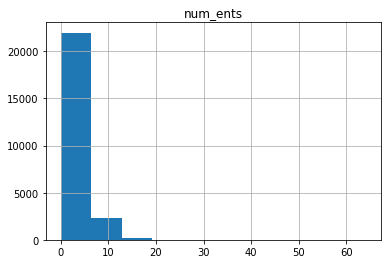

In [52]:
import pandas as pd
def show_ent_dist(lens):
    d = pd.DataFrame(lens, columns=["num_ents"])
    print(len(lens),np.max(lens))  
    # for lens_a, max= 64,  maxlen = 20  is pretty safe    99.84 ( < 10 --> 96.94
    # for lens_c, max= 47,  maxlen = 20  is pretty safe    99.97 ( < 10 --> 98.76 
    # for lens_d, max= 42,  maxlen = 20  is pretty safe    99.97 ( < 10 --> 98.89 
    # for lens_y, max= 20,  maxlen = 20  is pretty safe    100   ( < 10 --> 99.77 
    print(d[d.num_ents < 21].shape[0] /d.shape[0])  
    print(d[d.num_ents < 20].shape[0] /d.shape[0])  
    print(d[d.num_ents < 10].shape[0] /d.shape[0])  
    d.hist()

show_ent_dist(lens_a)


In [21]:
!ls /home/diego/adv_comp_viz21/lxmert/orig_code/lxmert/valid_kvqa0_ent_spans_yasu_0.json

/home/diego/adv_comp_viz21/lxmert/orig_code/lxmert_gen/Transformer-MM-Explainability-main


In [125]:
# WHEN YOU GET BACK
# while thats running figure out how to use YASU's  ( what is diff between test and val ?)
# combine into one file

yasu_train0 = json.load(open("/home/diego/adv_comp_viz21/lxmert/orig_code/lxmert/train_kvqa0_ent_spans_yasu_1.json"))
yasu_val0 = json.load(open("/home/diego/adv_comp_viz21/lxmert/orig_code/lxmert/valid_kvqa0_ent_spans_yasu_1.json"))
yasu_test0 = json.load(open("/home/diego/adv_comp_viz21/lxmert/orig_code/lxmert/test_kvqa0_ent_spans_yasu_1.json"))
print(len(yasu_train0), len(yasu_val0), len(yasu_test0), len(yasu_train0) + len(yasu_val0) + len(yasu_test0))  #17157 4947 22104

train_ks = set(list(yasu_train0.keys()))
val_ks = set(list(yasu_val0.keys()))
test_ks = set(list(yasu_test0.keys()))

print("Train interesect with val:", len(train_ks.intersection(val_ks)))
print("Train interesect with test:", len(test_ks.intersection(val_ks)))
print("Test interesect with val:", len(test_ks.intersection(val_ks)))

yasu_train0.update(yasu_val0)
yasu_train0.update(yasu_test0)

with open("kvqa0_ent_spans_yasu1.json", "w") as f:
    json.dump(yasu_train0, f)    

lens_y = [len(yasu_train0[q]['ents_found']) for q in yasu_train0]

print(len(lens_y), sum(lens_y), round(np.mean(lens_y),4), round(sum([1 if v > 0 else 0 for v in lens_y])/len(lens_y),4))  



# then do explainability stuff / human eval /metrics stuff
# try heuristic on KVQA
# do the ROIs come with object labels?
# run other experiments for OKVQA in background ( waiting on 5th 4k, 5th 2k, 4th plain and then do 5th plain )

17157 4947 2498 24602
Train interesect with val: 0
Train interesect with test: 0
Test interesect with val: 0
24602 55386 2.2513 0.9548


In [79]:
#type(prior_ents_dict)   #dict
#type(ents_per_q)   #list
#ents_per_q = json.load(open("kvqa_ent_spans_sep13_3span"))   
#min_ents = json.load(open("kvqa_ent_spans_sep13_4span"))
#fin_ents 


# NOW SAVE OUT JSON FILES IN CORRECT FORMAT!! not as lists but rather as dicts{ qid: {'wikiCap_new': '', 'ents_found':''}
ks = list(prior_ents_dict.keys())
new_ents_per = {q:{"wikiCap_new":"", "ents_found":[]} for q in kvqa_qs}
new_fin_entsb = {q:{"wikiCap_new":"", "ents_found":[]} for q in kvqa_qs}

for i, qid in enumerate(kvqa_qs):
    cap = kvqa_qs[qid]["wikiCap"]
    new_ents_per[qid]["wikiCap_new"] = cap
    new_ents_per[qid]["ents_found"] = [ [e[0], e[1], e[2], e[0].title()] for e in ents_per_q[i]]#ents_per_q[i]

    new_fin_entsb[qid]["wikiCap_new"] = cap
    new_fin_entsb[qid]["ents_found"] = fin_entsb[i]

    
# NOW MOVE AND USE THESE TWO

with open("kvqa_ent_spans_sept13_3corb.json", "w") as f:
    json.dump(new_ents_per, f)
"""
with open("kvqa_ent_spans_sept13_fewkbcor.json", "w") as f:
    json.dump(new_fin_entsb, f)
"""

'\nwith open("kvqa_ent_spans_sept13_fewkbcor.json", "w") as f:\n    json.dump(new_fin_entsb, f)\n'

In [77]:
#list(prior_ents_dict.keys())[0]
fin_entsb = json.load(open("kvqa_ent_spans_sept13_fewkb.json"))
print("\n",fin_entsb[0])
for i, f in enumerate(fin_entsb):
    loc = []
    for e in f:
        if len(e[4]) > 1:
            loc.append([e[0],e[1],e[2],e[4][0]])
        elif e[4][0] != e[3]:
            loc.append([e[0],e[1],e[2],e[4][0]])
        else:
            loc.append([e[0],e[1],e[2],e[3]])
    fin_entsb[i] = loc
print(prior_ents_dict['21717'])
print("\n",ents_per_q[0])
print("\n",fin_ents[0])
print("\n",fin_entsb[0])
print("\n\n",new_ents_per['21717'])
print("\n",new_fin_entsb['21717'])


 [['Francis Condon', 0, 14, 'Francis Condon', ['Francis Condon']], ['early 20th Century', 22, 40, 'Early 20Th Century', ['20th century', '20th-century philosophy', '20th century music', 'Western use of the swastika in the early 20th century', 'List of 20th Century Fox films (1935–1999)', '20th Television', '20th Century Boys']]]
{'wikiCap_new': 'Francis Condon in the early 20th Century', 'ents_found': [['Francis Condon', 0, 14]]}

 [['Francis Condon', 0, 14], ['early 20th Century', 22, 40]]

 [['Francis Condon', 0, 14, 'Francis Condon', ['Francis Condon']]]

 [['Francis Condon', 0, 14, 'Francis Condon'], ['early 20th Century', 22, 40, '20th century']]


 {'wikiCap_new': 'Francis Condon in the early 20th Century', 'ents_found': [['Francis Condon', 0, 14], ['early 20th Century', 22, 40]]}

 {'wikiCap_new': 'Francis Condon in the early 20th Century', 'ents_found': [['Francis Condon', 0, 14, 'Francis Condon'], ['early 20th Century', 22, 40, '20th century']]}


In [ ]:
#09/16
# ENT SPANS CONSIDRED FOR KVQA

# new_kvqa_q_caps_ents0502               # 28930  1.1759 1.0
# kvqa_ent_spans_sep13_3spa              # 89905  3.6544 0.981        #Wiki titles not given
# kvqa_ent_spans_sept13_fewkb.json       # 71550  2.9083 0.9585       #filtered from prior with wiki titles given
# kvqa0_ent_spans_yasu0.json             # 48708  1.9798 0.9224   
# kvqa1_ent_spans_yasu0.json             # 55386  2.2513 0.9548   

abs_path = "/home/diego/adv_comp_viz21/lxmert/orig_code/lxmert/"
oracle_spans_dict = json.load(open(abs_path + "data/kvqa/new_kvqa_q_caps_ents0502.json"))
sep13_spans_dict = json.load(open(abs_path + "data/kvqa/kvqa_ent_spans_sept13_3corb.json"))  
sep13_few_spans_dict = json.load(open(abs_path + "data/kvqa/kvqa_ent_spans_sept13_fewkbcor.json"))
yasu0_0_spans_dict = json.load(open(abs_path + "data/kvqa/kvqa0_ent_spans_yasu0.json"))
yasu0_1_spans_dict = json.load(open(abs_path + "data/kvqa/kvqa0_ent_spans_yasu1.json"))

# NOW DO NEW YASU
# DO KVQA HEURISTIC BELOW IT
# WHEN GPUS are free do perturb for all 8
# GET HUMAN EVAL ( possibly automated ) STUFF for explainability ( make a rtf of images/expl ( the 4 panel ) and spreadsheet
#   for both KVQA (one split) and OKVQA 

# send stuff for Yasu to make tables

In [126]:
#os.chdir(f'../lxmert_gen/Transformer-MM-Explainability-main/')
from lxmert.lxmert.src.lxrt.tokenization import BertTokenizer
lxmert_tokenizer = BertTokenizer.from_pretrained( "bert-base-uncased", do_lower_case=True)

#lens_y = [len(oracle_spans_dict[q]['ents_found']) for q in oracle_spans_dict]
#print(len(lens_y), sum(lens_y), round(np.mean(lens_y),4), round(sum([1 if v > 0 else 0 for v in lens_y])/len(lens_y),4))

# plain - made using no lrp explaination and plain KVQA question
# capt  - made using no lrp "" and KVQA question with added caption
# ebert oracle - made using no lrp  and KVQA question with caption including true entities in images (caption affected)
# 
#
# 

24602 28930 1.1759 1.0


In [ ]:
# TODO:  decide if we focus on split 0 for EVAL
import time
split = 0
def get_kvqa_perturb_records(split=0):
    # TODO: run perturb for sep13_3 and sep13_few for 1 - 4
    print("Getting Explanation records for KVQA Split:", split)
    st = time.time()
    if split == 0:                                                                     #   top1   top5  t1raw t5raw  total
        plain_records = json.load(open("experiments/kvqa_plain_0_newlxmo_0905.json"))  # [47.27, 66.71, 8838, 12473, 18697]
        capt_records = json.load(open("experiments/kvqa_capt_0_newlxmo_0905.json"))    # [49.84, 67.66, 9318, 12650, 18697]
        ebert_records =  json.load(open("experiments/kvqa_ebert_0_newlxmo_0905.json")) # [51.66, 69.10, 9659, 12919, 18697]
        ebert_sep13_3 = json.load(open("experiments/kvqa_ebert_0_sep13_3.json"))       # [49.97, 67.21, 9343, 12567, 18697]
        ebert_sep13_few = json.load(open("experiments/kvqa_ebert_0_sep13_fewkb.json")) # [50.05, 67.56, 9358, 12631, 18697]
    if split == 1:                          
        plain_records = json.load(open("experiments/kvqa_plain_1_newlxmo_0905.json"))  # [47.54, 67.27, 8797, 12448, 18505]
        capt_records = json.load(open("experiments/kvqa_capt_1_newlxmo_0905.json"))    # [50.43, 68.28, 9332, 12636, 18505]
        ebert_records =  json.load(open("experiments/kvqa_ebert_1_newlxmo_0905.json")) # [52.20, 69.20, 9660, 12805, 18505]
        ebert_sep13_3 = json.load(open("experiments/kvqa_ebert_1_sep13_3.json"))       # [50.33, 67.49, 9313, 12489, 18505]
        ebert_sep13_few = json.load(open("experiments/kvqa_ebert_1_sep13_fewkb.json")) # [50.42, 67.75, 9330, 12537, 18505]
    if split == 2:                                   
        plain_records = json.load(open("experiments/kvqa_plain_2_newlxmo_0905.json"))  # [47.35, 67.16, 8853, 12556, 18696]
        capt_records = json.load(open("experiments/kvqa_capt_2_newlxmo_0905.json"))    # [50.66, 68.06, 9471, 12725, 18696]
        ebert_records =  json.load(open("experiments/kvqa_ebert_2_newlxmo_0905.json")) # [52.12, 69.20, 9745, 12937, 18696]
        ebert_sep13_3 = json.load(open("experiments/kvqa_ebert_2_sep13_3.json"))       # [50.29, 67.24, 9403, 12571, 18696]
        ebert_sep13_few = json.load(open("experiments/kvqa_ebert_2_sep13_fewkb.json")) # [50.34, 67.13, 9411, 12550, 18696]
    if split == 3:
        plain_records = json.load(open("experiments/kvqa_plain_3_newlxmo_0901.json"))  # [48.35, 67.37, 9306, 12968, 19248]
        capt_records = json.load(open("experiments/kvqa_capt_3_newlxmo_0901.json"))    # [51.05, 68.04, 9827, 13097, 19248]
        ebert_records =  json.load(open("experiments/kvqa_ebert_3_newlxmo_0901.json")) # [53.18, 69.42, 10236, 13361, 19248]
        ebert_sep13_3 = json.load(open("experiments/kvqa_ebert_3_sep13_3.json"))       # [51.47, 68.34, 9907, 13155, 19248]
        ebert_sep13_few = json.load(open("experiments/kvqa_ebert_3_sep13_fewkb.json")) # [51.27, 67.59, 9869, 13009, 19248]
    if split == 4:
        plain_records = json.load(open("experiments/kvqa_plain_4_newlxmo_0905.json"))  # [47.18, 67.04, 8549, 12148, 18120]
        capt_records = json.load(open("experiments/kvqa_capt_4_newlxmo_0905.json"))    # [49.25, 67.36, 8925, 12205, 18120]
        ebert_records =  json.load(open("experiments/kvqa_ebert_4_newlxmo_0905.json")) # [52.15, 68.82, 9449, 12471, 18120]
        ebert_sep13_3 = json.load(open("experiments/kvqa_ebert_3_sep13_4.json"))       # [50.43, 67.68, 9138, 12263, 18120]
        ebert_sep13_few = json.load(open("experiments/kvqa_ebert_4_sep13_fewkb.json")) # [49.75, 67.22, 9014, 12181, 18120]
    if split == "all":
        sp0 = get_kvqa_perturb_records(split=0)
        sp1 = get_kvqa_perturb_records(split=1)
        sp2 = get_kvqa_perturb_records(split=2)
        sp3 = get_kvqa_perturb_records(split=3)
        sp4 = get_kvqa_perturb_records(split=4)
        plain_records, capt_records, ebert_records, ebert_sep13_3, ebert_sep13_few = sp0
        for recs in [sp1, sp2, sp3, sp4]:
            pr, cr, er, es3, esfew = recs
            plain_records.update(pr) 
            capt_records.update(cr) 
            ebert_records.update(er) 
            ebert_sep13_3.update(es3) 
            ebert_sep13_few.update(esfew)
    print("Elapsed.", time.time() - st)
    return plain_records, capt_records, ebert_records, ebert_sep13_3, ebert_sep13_few

#############################################
#############################################
#############################################
########################   SUPER IMPORTANT          SET SPLIT NUMBER HERE
#############################################
#############################################
#############################################

split = 0
plain_records, capt_records, ebert_records, ebert_sep13_3, ebert_sep13_few = get_kvqa_perturb_records(split)

In [224]:
#09/15
##DO KVQA HEURISTIC comparing CAPT and EBERT

# GENERATE pandas to use for differentiating results 
tokenize = False 
toshow = 0
pd_rows = []
for ind, k in enumerate(plain_records):
    imgid = k.split("_")[0]
    q = int(k.split("_")[1])
    cur_dict = {'Plain':plain_records[k], 'CAPT':capt_records[k], 'EBERT-oracle':ebert_records[k],
               'EBERT-sep13': ebert_sep13_3[k], 'EBERT-sep13_few': ebert_sep13_few[k]}
    cur_ents = {'Plain':[], 'CAPT':[], 'EBERT-oracle':oracle_spans_dict[imgid]["ents_found"],
               'EBERT-sep13':sep13_spans_dict[imgid]["ents_found"],
               'EBERT-sep13_few':sep13_few_spans_dict[imgid]["ents_found"]}

    true_ans = plain_records[k]['true_ans']
    capt = kvqa_qs[imgid]['wikiCap']
    oracle_capt = entity_spans_dict[imgid]['wikiCap_new']
    sent = kvqa_qs[imgid]['Questions'][q]
    if ind < toshow:
        print("\n"+k, sent,'\ntrue_ans', true_ans )    #true ans is incorrectly saved so use from questions directly    

    # perturbation_okvqa.py now passes in "tokens" in records 
    # whereas here we don't have it have it for Plain, CAPT or EBERT-oracle
    # so we need to either re-run those threes perturb_kvqa or load tokenizer to do it
    
    for i in cur_dict:
        v = cur_dict[i]
        if "tokens" not in v:
            tokens = []            
            if i == "Plain":
                if tokenize:
                    tokens = lxmert_tokenizer.tokenize(sent)                
            elif i in ["CAPT", 'EBERT-sep13', 'EBERT-sep13_few']:
                if tokenize:
                    tokens = lxmert_tokenizer.tokenize(sent+" " + capt)
            elif i == "EBERT-oracle":
                if tokenize:
                    tokens = lxmert_tokenizer.tokenize(sent+" " + oracle_capt)
        else:
            tokens = v["tokens"]
            #TODO if tokens does exist also check if its same as what lxmert_tokenizer gives ( just      
        
        if ind < toshow:
            print(i, "\t", round(v['top1acc'],3), "\t", v['top5'], [round(b,3) for b in v['top5probs']], "\t", v['top5acc'] )
        
        #add ent_sets and explanations as well here
        pd_rows.append([k,vind, i, round(v['top1acc'],3), v['top5acc'], v['top5'],[round(b,3) for b in v['top5probs']],
                       true_ans, len(cur_ents[i]), cur_ents[i], v['text_expl'], tokens, v['image_expl'], v['bboxes']])
                  
df = pd.DataFrame(pd_rows, columns=["qid","val_ind","model","top1acc","top5acc","top5preds","top5probs","true_ans",
                                    "num_ents","ent_set","text_expl","tokens","image_expl","bboxes"])  

In [225]:
#df.head(5)

In [226]:
print("SPLIT",split,"        Top 1 Top 5 Acc of over all test questions", df[df.model == 'Plain'].shape[0], )
kmods = ['Plain', 'CAPT', 'EBERT-sep13', 'EBERT-sep13_few', 'EBERT-oracle']
#split_res = {0:[], 1:[], 2:[], 3:[], 4:[], 'all':[]}
for m in kmods:
    comp = ""
    if m == "CAPT":
        diff = 100 * round(round(df[df.model == m]['top1acc'].mean(),4) - round(df[df.model == "Plain"]['top1acc'].mean(),4),4)
        diff = str(diff)[0:4]
        comp = diff + " over Plain"
    elif m in ['EBERT-oracle', 'EBERT-sep13', 'EBERT-sep13_few']:
        diff = 100 * round(round(df[df.model == m]['top1acc'].mean(),6) - round(df[df.model == "CAPT"]['top1acc'].mean(),6),6)
        #print(diff)
        neg = diff < 0
        comp = str(diff)[0:5] + " worse than Capt" if neg  else str(diff)[0:4] + " better than Capt"
        
    top1 = 100 * round(df[df.model == m]['top1acc'].mean(),4)
    top5 = 100 * round(df[df.model == m]['top5acc'].mean(),4)
    print(m, str(top1)[0:5],str(top5)[0:5]," ", comp) # str(top5)[0:5], " ", comp)
    split_res[split].append([m, str(top1)[0:5], str(top5)[0:5]])

    
    
""" Ent span Coverage is so high for KVQA this gives nearly identical results to prior section (not interesting)
print("\nTop 1 and 5 Acc over all test questions with test ents")
for m in kmods:
    if m in ['Plain','CAPT'] :
        
        for m2 in ['EBERT-oracle', 'EBERT-sep13', 'EBERT-sep13_few']:
            m2rows = df[(df.model == m2) & (df.num_ents >0)]
            plain_rows = df[(df.model == m)&(df.qid.isin(m2rows.qid.values))]
            top1 = 100 * round(plain_rows['top1acc'].mean(),4)
            top5 = 100 * round(plain_rows['top5acc'].mean(),4)
            print(m, " where ",m2," has ents", str(top1)[0:5], str(top5)[0:5], plain_rows.shape[0])
        
    else:
        rows = df[(df.model == m) & (df.num_ents >0)]
        top1 = 100 * round(rows['top1acc'].mean(),4)
        top5 = 100 * round(rows['top5acc'].mean(),4)
        print(m, str(top1)[0:5], str(top5)[0:5], rows.shape[0])
"""

                                     
"""                                     
SPLIT 0         Top 1 Acc of over all test questions 18697
          Plain 47.27 66.71 
           CAPT 49.84 67.66   2.57 over Plain
    EBERT-sep13 49.97 67.21   0.13 better than Capt
EBERT-sep13_few 50.05 67.56   0.21 better than Capt
   EBERT-oracle 51.66 69.10   1.82 better than Capt

SPLIT 1         Top 1 Top 5 Acc of over all test questions 18505
          Plain 47.54 67.27 
           CAPT 50.43 68.28   2.88 over Plain
    EBERT-sep13 50.33 67.49  -0.10 worse than Capt
EBERT-sep13_few 50.42 67.75  -0.01 worse than Capt
   EBERT-oracle 52.20 69.19   1.77 better than Capt

SPLIT 2         Top 1 Top 5 Acc of over all test questions 18696
          Plain 47.34 67.16   
           CAPT 50.66 68.06   3.30 over Plain
    EBERT-sep13 50.29 67.24  -0.36 worse than Capt
EBERT-sep13_few 50.33 67.13  -0.32 worse than Capt
   EBERT-oracle 52.12 69.19   1.46 better than Capt

SPLIT 3         Top 1 Top 5 Acc of over all test questions 19248
          Plain 48.35 67.36   
           CAPT 51.05 68.04   2.70 over Plain
    EBERT-sep13 51.47 68.34   0.41 better than Capt
EBERT-sep13_few 51.27 67.58   0.21 better than Capt
   EBERT-oracle 53.18 69.42   2.12 better than Capt

SPLIT 4         Top 1 Top 5 Acc of over all test questions 18120
          Plain 47.18 67.04   
           CAPT 49.25 67.36   2.07 over Plain
    EBERT-sep13 50.43 67.67   1.17 better than Capt
EBERT-sep13_few 49.75 67.22   0.49 better than Capt
   EBERT-oracle 52.15 68.82   2.89 better than Capt
              
              
SPLIT all       Top 1 Top 5 Acc of over all test questions 76425
          Plain 47.61 67.15   
           CAPT 50.21 67.90   2.60 over Plain
    EBERT-sep13 50.56 67.69   0.34 better than Capt
EBERT-sep13_few 50.37 67.49   0.16 better than Capt
   EBERT-oracle 52.30 69.19   2.09 better than Capt              
"""
print()

SPLIT all         Top 1 Top 5 Acc of over all test questions 76425
Plain 47.61 67.15   
CAPT 50.21 67.9   2.6 over Plain
EBERT-sep13 50.56 67.69   0.34 better than Capt
EBERT-sep13_few 50.37 67.49   0.16 better than Capt
EBERT-oracle 52.30 69.19   2.09 better than Capt



In [237]:
#make splits across the top, ending in all, and then capt  and put models as row

res = {}
for k in kmods:
    res[k] = [ ]
for i in [0,1,2,3,4,'all']:
    cur_vs = split_res[i]
    for v in cur_vs:
        res[v[0]].append(float(v[1]))
res['Plain'].append("")
res['CAPT'].append("2.60 over Plain")
res['EBERT-sep13'].append("0.34 better than Capt")
res['EBERT-sep13_few'].append("0.16 better than Capt")
res['EBERT-oracle'].append("2.09 better than Capt")

vals = [ [k] + res[k] for k in kmods]
rdf = pd.DataFrame( vals,columns=["Model","Split 1", "Split 2", "Split 3", "Split 4", "Split 5", "All", "Delta"])
rdf

,Model,Split 1,Split 2,Split 3,Split 4,Split 5,All,Delta
0,Plain,47.27,47.54,47.34,48.35,47.18,47.61,
1,CAPT,49.84,50.43,50.66,51.05,49.25,50.21,2.60 over Plain
2,EBERT-sep13,49.97,50.33,50.29,51.47,50.43,50.56,0.34 better than Capt
3,EBERT-sep13_few,50.05,50.42,50.33,51.27,49.75,50.37,0.16 better than Capt
4,EBERT-oracle,51.66,52.20,52.12,53.18,52.15,52.30,2.09 better than Capt


In [242]:
"""
[['Plain', 47.27, 47.54, 47.34, 48.35, 47.18, 47.61, ''],
 ['CAPT', 49.84, 50.43, 50.66, 51.05, 49.25, 50.21, '2.60 over Plain'],
 ['EBERT-sep13', 49.97, 50.33, 50.29, 51.47, 50.43, 50.56, '0.34 better than Capt'],
 ['EBERT-sep13_few', 50.05, 50.42, 50.33, 51.27, 49.75, 50.37, '0.16 better than Capt'],
 ['EBERT-oracle', 51.66, 52.2, 52.12, 53.18, 52.15, 52.3, '2.09 better than Capt']]
"""
print(rdf.to_latex(index=False))

\begin{tabular}{lrrrrrrl}
\toprule
          Model &  Split 1 &  Split 2 &  Split 3 &  Split 4 &  Split 5 &   All &                 Delta \\
\midrule
          Plain &    47.27 &    47.54 &    47.34 &    48.35 &    47.18 & 47.61 &                       \\
           CAPT &    49.84 &    50.43 &    50.66 &    51.05 &    49.25 & 50.21 &       2.60 over Plain \\
    EBERT-sep13 &    49.97 &    50.33 &    50.29 &    51.47 &    50.43 & 50.56 & 0.34 better than Capt \\
EBERT-sep13\_few &    50.05 &    50.42 &    50.33 &    51.27 &    49.75 & 50.37 & 0.16 better than Capt \\
   EBERT-oracle &    51.66 &    52.20 &    52.12 &    53.18 &    52.15 & 52.30 & 2.09 better than Capt \\
\bottomrule
\end{tabular}



<AxesSubplot:ylabel='Density'>

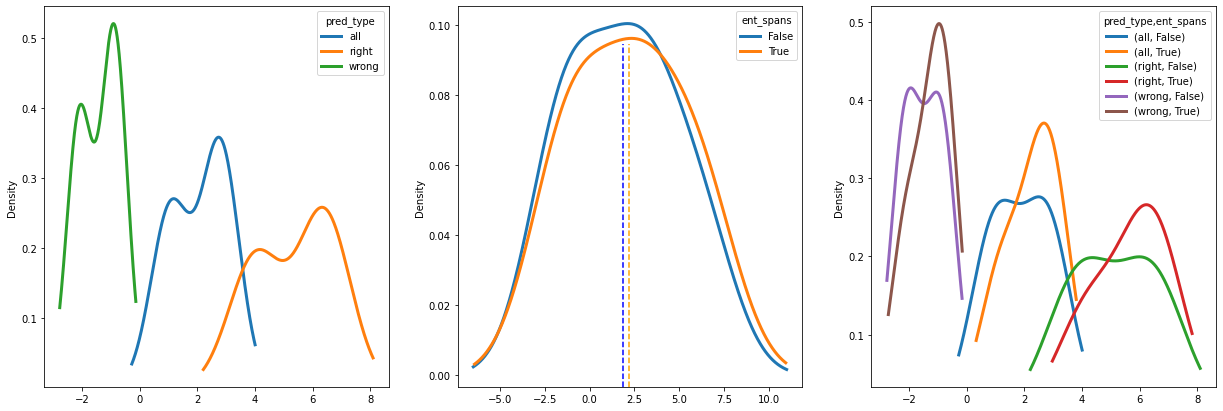

In [294]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def construct_conf_graphs(conf_df):

    tmp_df = pd.DataFrame()
    for i in range(21):    
        cur = conf_df.probs.values[i]
        mean = round(conf_df["mean"].values[i],3)
        std = round(conf_df["std"].values[i],3)
        mod_type = conf_df["model"].values[i]
        pred_type = conf_df["pred_type"].values[i]
        if len(cur) < 76425:
            cur.extend([None] * (76425 - len(cur)))
        entspans = "" if conf_df["ent_spans"].values[i] == False else "with spans"
        colname = "c"+str(i) + " " + mod_type + " " + pred_type + " " + entspans + " " + str(mean) + " " + str(std)
        tmp_df[colname] = cur

    fig, axes = plt.subplots(nrows=6, ncols=2)
    for i, col in enumerate(tmp_df.columns):    
        if "CAPT" in col:
            c, r = 0, 0
        elif "EBERT-oracle" in col and "with spans" not in col:
            c, r = 0, 1
        elif "EBERT-oracle" in col and "with spans" in col:
            c, r = 1, 1
        elif "EBERT-sep13_few" in col and "with spans" not in col:
            c, r = 0, 2
        elif "EBERT-sep13_few" in col and "with spans" in col:
            c, r = 1, 2
        elif "EBERT-sep13" in col and "with spans" not in col:
            c, r = 0, 3
        elif "EBERT-sep13" in col and "with spans" in col:
            c, r = 1, 3

        tmp_df[col].plot(kind='density', figsize = (22, 22), ax=axes[r,c], legend=True)

        height = .9
        if "right" in col:
            color_choice = "orange"
        elif "wrong" in col:
            color_choice = "green"
        else:
            color_choice = "blue"
            height = .8

        axes[r,c].axvline(conf_df["mean"].values[i], 0,height, ls="--", color=color_choice)
   
    #show all right on bottom right and all wrong on 
    for i, col in enumerate(tmp_df.columns): 
        show = True
        if "CAPT right" in col:
            c, r = 0, 4
        elif "CAPT wrong" in col:
            c, r = 1, 4
        elif "right" in col and "with spans" not in col:
            c, r = 0, 4
        elif "right" in col and "with spans" in col:
            c, r = 0, 5
        elif "wrong" in col and "with spans" not in col:
            c, r = 1, 4
        elif "wrong" in col and "with spans" in col:
            c, r = 1, 5
        else:
            show = False

        if show:
            tmp_df[col].plot(kind='density', figsize = (22, 22), ax=axes[r,c], legend=True)

            height = .9
            if "with spans" not in col:
                if "CAPT" in col:
                    color_choice = "blue"
                elif "EBERT-sep13_few" in col:
                    color_choice = "orange"
                elif "EBERT-sep13" in col:
                    color_choice = "green"
                else:
                    color_choice = "red"
            else:
                if "EBERT-sep13" in col:
                    color_choice = "blue"
                elif "EBERT-sep13_few" in col:
                    color_choice = "orange"
                else:
                    color_choice = "green"

            axes[r,c].axvline(conf_df["mean"].values[i], 0,height, ls="--", color=color_choice)
    fig.show() 

    
    
def construct_all_pairwise_conf():
    v = get_conf_vals(model1_str='CAPT',sub_qs = "all", subset_ents=False)
    v1 = get_conf_vals(model1_str='CAPT',sub_qs = "right", subset_ents=False)
    v2 = get_conf_vals(model1_str='CAPT',sub_qs = "wrong", subset_ents=False)

    #print("\n")
    v3 = get_conf_vals(model1_str='EBERT-sep13',sub_qs = "all", subset_ents=False)
    v4 = get_conf_vals(model1_str='EBERT-sep13',sub_qs = "right", subset_ents=False)
    v5 = get_conf_vals(model1_str='EBERT-sep13',sub_qs = "wrong", subset_ents=False)
    v6 = get_conf_vals(model1_str='EBERT-sep13',sub_qs = "all", subset_ents=True)
    v7 = get_conf_vals(model1_str='EBERT-sep13',sub_qs = "right", subset_ents=True)
    v8 = get_conf_vals(model1_str='EBERT-sep13',sub_qs = "wrong", subset_ents=True)

    #print("\n")
    v13 = get_conf_vals(model1_str='EBERT-sep13_few',sub_qs = "all", subset_ents=False)
    v14 = get_conf_vals(model1_str='EBERT-sep13_few',sub_qs = "right", subset_ents=False)
    v15 = get_conf_vals(model1_str='EBERT-sep13_few',sub_qs = "wrong", subset_ents=False)
    v16 = get_conf_vals(model1_str='EBERT-sep13_few',sub_qs = "all", subset_ents=True)
    v17 = get_conf_vals(model1_str='EBERT-sep13_few',sub_qs = "right", subset_ents=True)
    v18 = get_conf_vals(model1_str='EBERT-sep13_few',sub_qs = "wrong", subset_ents=True)

    #print("\n")
    v23 = get_conf_vals(model1_str='EBERT-oracle',sub_qs = "all", subset_ents=False)
    v24 = get_conf_vals(model1_str='EBERT-oracle',sub_qs = "right", subset_ents=False)
    v25 = get_conf_vals(model1_str='EBERT-oracle',sub_qs = "wrong", subset_ents=False)
    v26 = get_conf_vals(model1_str='EBERT-oracle',sub_qs = "all", subset_ents=True)
    v27 = get_conf_vals(model1_str='EBERT-oracle',sub_qs = "right", subset_ents=True)
    v28 = get_conf_vals(model1_str='EBERT-oracle',sub_qs = "wrong", subset_ents=True)

    #make latex table of this and above
    mod = ["CAPT", "EBERT-sep13", "EBERT-sep13", "EBERT-sep13_few", "EBERT-sep13_few", "EBERT-oracle", "EBERT-oracle"]
    sub = [False, False, True, False, True, False, True]
                      #f    f   t   f    t    f    t    
                      #p    2   2   4    4    o    o
    rdict = { 'all' : [v , v3, v6, v13, v16, v23, v26] ,
             'right': [v1, v4, v7, v14, v17, v24, v27] , 
             'wrong': [v2, v5, v8, v15, v18, v25, v28] }
    res = []
    for k in rdict:
        for i, top_probs in enumerate(rdict[k]):        
            res.append([ k, mod[i], sub[i], len(top_probs),
                        round(np.mean(top_probs),5),round(np.median(top_probs),5), round(np.std(top_probs),5),
                        np.min(top_probs), np.max(top_probs), top_probs])

    return pd.DataFrame(res, columns = ["pred_type", "model", "ent_spans", "num_rows", "mean", "median", "std", "min", "max", "probs" ])

   
# IS THE ISSUE THAT ENT SPANS AREN'T EXACTLY RIGHT ?  <-- its from question, and not size of sets passed in 
conf_df = construct_all_pairwise_conf() 
    
fig, axes = plt.subplots(nrows=1, ncols=3)
data_wide = conf_df.pivot(columns=['pred_type'],  values='mean')
data_wide.plot.density(figsize = (21, 7), linewidth = 3, ax=axes[0], legend=True,)

data_wide = conf_df.pivot(columns=['ent_spans'],  values='mean')
data_wide.plot.density(figsize = (21, 7), linewidth = 3, ax=axes[1], legend=True)
axes[1].axvline(conf_df[conf_df["ent_spans"] == True]["mean"].mean(), 0,.9, ls="--", color="orange")
axes[1].axvline(conf_df[conf_df["ent_spans"] == False]["mean"].mean(), 0,.9, ls="--", color="blue")

data_wide = conf_df.pivot(columns=['pred_type','ent_spans'],  values='mean')
data_wide.plot.density(figsize = (21, 7), linewidth = 3, ax=axes[2], legend=True)

/home/diego/adv_comp_viz21/lxmert/orig_code/lxmert_expl/lib/python3.7/site-packages/ipykernel_launcher.py:89: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.


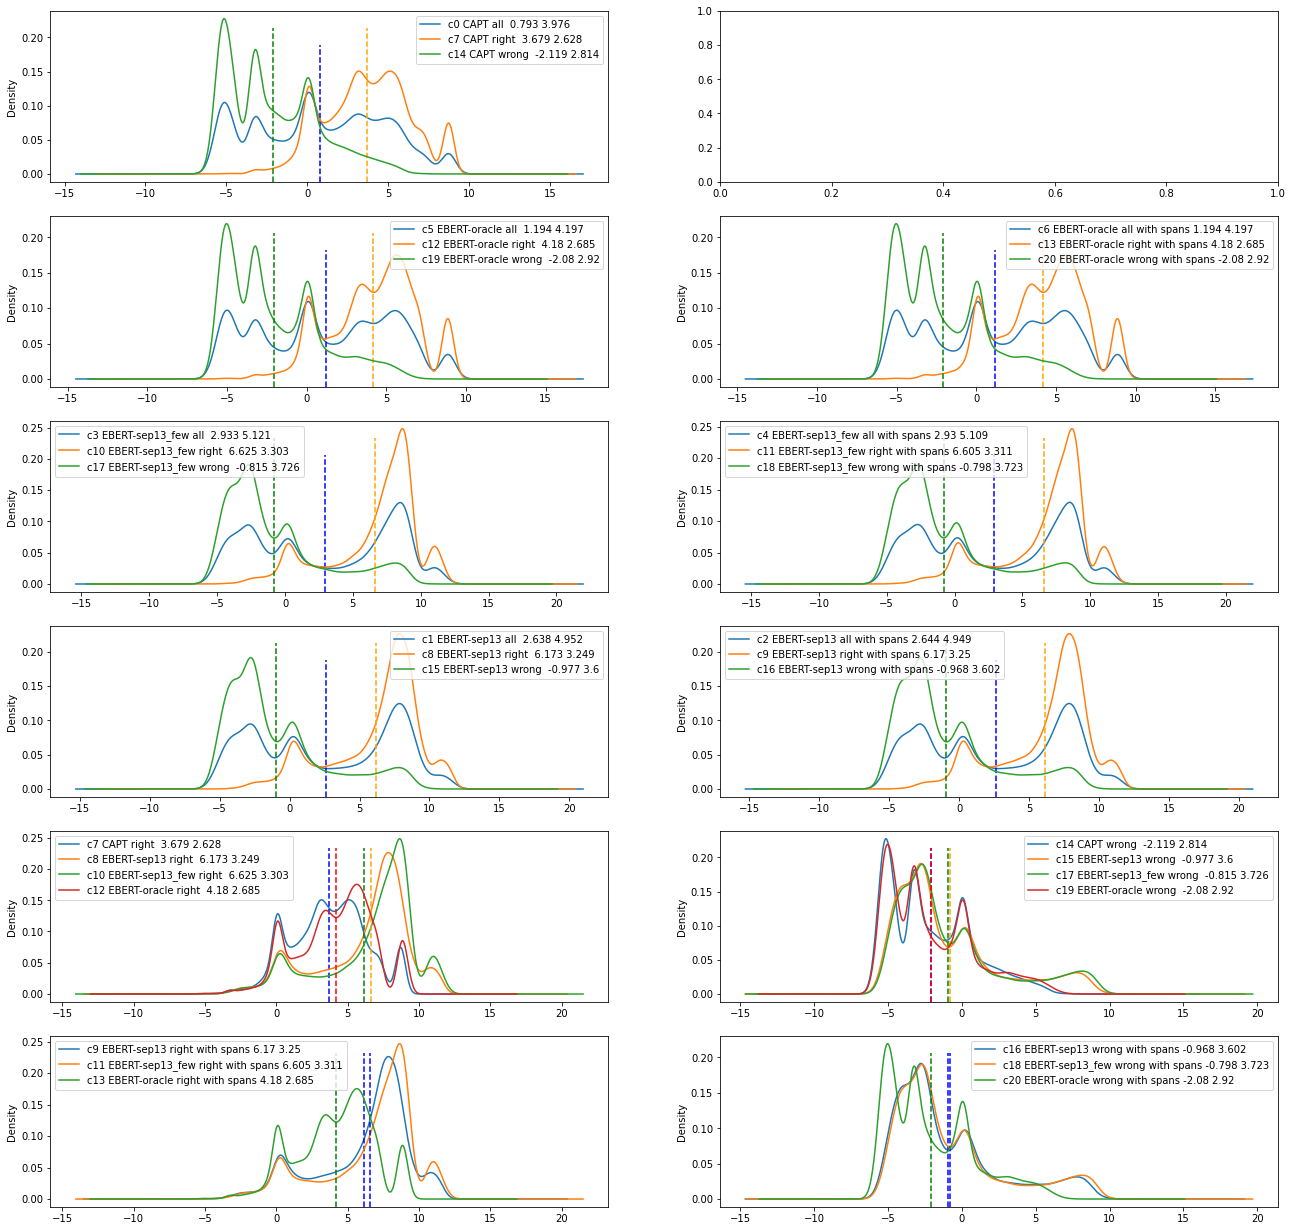

In [295]:
construct_conf_graphs(conf_df)

In [326]:
def get_conf_vals(model1_str,sub_qs = "all", subset_ents=True, print_out=False):    
    if subset_ents and sub_qs == "all":     
        rows = df[(df.model == model1_str) & (df.num_ents >0)]        
    elif subset_ents:
        if sub_qs == "right":
            rows = df[(df.model == model1_str) & (df.num_ents >0) & (df.top1acc > 0)]        
        elif sub_qs == "wrong":
            rows = df[(df.model == model1_str) & (df.num_ents >0) & (df.top1acc == 0)]                    
    else:
        if sub_qs == "right":
            rows = df[(df.model == model1_str) & (df.top1acc > 0)]        
        elif sub_qs == "wrong":
            rows = df[(df.model == model1_str) & (df.top1acc == 0)] 
        elif sub_qs == "all":
            rows = df[(df.model == model1_str) ]   #return all rows
        else:
            rows = df[(df.model == model1_str) & (df.num_ents  == 0)]   #return all rows with no ents

       
    top_probs = [ v[0] for v in rows["top5probs"]]
    ees = "with" if subset_ents else "without"
    if print_out:
        print(model1_str+" ",len(top_probs)," questions ("+sub_qs+") "+ ees +" ent_spans Conf numbs: ",
              round(np.mean(top_probs),5),round(np.median(top_probs),5), round(np.std(top_probs),5),
              np.min(top_probs), np.max(top_probs))
    return top_probs

def get_skipped_stats(model_str, agro_skip, wagro_skip, cutoff="agro"):
    agro_skip_res = df[(df.model == model_str)&(df.index.isin(agro_skip))]
    wagro_skip_res  = df[(df.model == model_str)&(df.index.isin(wagro_skip))]
    agro_len = len(agro_skip) + len(wagro_skip)
    agro_sum1 = agro_skip_res.top1acc.sum() + wagro_skip_res.top1acc.sum()
    agro_sum5 = agro_skip_res.top5acc.sum() + wagro_skip_res.top5acc.sum()
    
    agro_qids = agro_skip_res.qid.values
    wagro_qids = wagro_skip_res.qid.values
    pagro_skip_res  = df[(df.model == 'CAPT')&(df.qid.isin(agro_qids))]
    pwagro_skip_res  = df[(df.model == 'CAPT')&(df.qid.isin(wagro_qids))]
    pagro_len = len(agro_skip) + len(wagro_skip)
    pagro_sum1 = pagro_skip_res.top1acc.sum() + pwagro_skip_res.top1acc.sum()
    pagro_sum5 = pagro_skip_res.top5acc.sum() + pwagro_skip_res.top5acc.sum()

    #add "using" Plain we'd get ...
    agro_used = df[(df.model == model_str)&(~df.index.isin(agro_skip+wagro_skip))]  #all model_str preds
    #wagro_used = df[(df.model == model_str)&(~df.index.isin(wagro_skip))]
    model_used_plus_plain_remain1 = round((agro_used.top1acc.sum() + pagro_sum1 )/ (agro_used.shape[0] + pagro_len),4)
    model_used_plus_plain_remain5 = round((agro_used.top5acc.sum() + pagro_sum5 )/ (agro_used.shape[0] + pagro_len),4)
    
    print("Due to ",cutoff," cutoffs ", len(agro_skip), len(wagro_skip), "=",agro_len,
          "\n "+model_str+" gets top1:",round(agro_skip_res.top1acc.mean(),4)," top5:",round(agro_skip_res.top5acc.mean(),4)," for cases without ents",len(agro_skip),
          "\n "+model_str+" gets top1:",round(wagro_skip_res.top1acc.mean(),4)," top5:",round(wagro_skip_res.top5acc.mean(),4)," for cases with ents", len(wagro_skip),
          "\n "+model_str+" combined results: top1:",round(agro_sum1/agro_len,4)," top5:",round(agro_sum5/agro_len,4)," for cases skipped by ",cutoff,". ",agro_len,
          "\n\n CAPT gets top1:",round(pagro_skip_res.top1acc.mean(),4)," top5:",round(pagro_skip_res.top5acc.mean(),4)," for cases with out ents",len(agro_skip),
          "\n CAPT gets top1:",round(pwagro_skip_res.top1acc.mean(),4)," top5:",round(pwagro_skip_res.top5acc.mean(),4)," for cases with ents", len(wagro_skip),
          "\n CAPT combined results: : top1:",round(pagro_sum1/pagro_len,4)," top5:",round(pagro_sum5/pagro_len,4)," for cases skipped by ",cutoff,". ",pagro_len,
          "\n\n If we combined "+model_str+" results that passed "+cutoff+" (",agro_used.shape[0],")"
          "and CAPT results on remaining(",pagro_len,")\n we'd get top1: ",
          model_used_plus_plain_remain1," and top5: ",model_used_plus_plain_remain5)
    
    
def look_at_cuttoffs(model_str = "EBERT-sep13", agro_cutoff = -2.5, neg_cutoff = -1, all_cutoff = -.2,
                     wagro_cutoff = -2.66, wneg_cutoff = -1.2, wall_cutoff = -.5):
    #default numbers are for 2.5 case
    #agro is 2 stds below "right" mean
    #neg is negative ("wrong") mean
    #all is all mean
    
    k2 = df[(df["model"]== model_str)]
    tot_with, tot_without = 0,0 
    changed_m, changed_c, changed_a = 0, 0, 0
    tot_score_m1, tot_score_m5, tot_score_c1, tot_score_c5, tot_score_a1, tot_score_a5 = 0, 0, 0, 0, 0, 0
    agro_skip, neg_skip, all_skip = [], [], []
    
    wchanged_m, wchanged_c, wchanged_a = 0, 0, 0
    wtot_score_m1, wtot_score_m5, wtot_score_c1, wtot_score_c5, wtot_score_a1, wtot_score_a5 = 0, 0, 0, 0, 0, 0
    wagro_skip, wneg_skip, wall_skip = [], [], []
    
    for k in k2.index.values:
        cur = k2.loc[k]        
        if cur.num_ents == 0:
            tot_without += 1
            if cur.top5probs[0] > neg_cutoff:   #negative cutoff
                changed_m += 1
                tot_score_m1 += cur.top1acc
                tot_score_m5 += cur.top5acc
            else:
                neg_skip.append(k)
                
            if cur.top5probs[0] > all_cutoff:  #all means cuttoff
                changed_c += 1
                tot_score_c1 += cur.top1acc
                tot_score_c5 += cur.top5acc
            else:
                all_skip.append(k)
            if cur.top5probs[0] > agro_cutoff:  #agro cuttoff
                changed_a += 1
                tot_score_a1 += cur.top1acc
                tot_score_a5 += cur.top5acc
            else:
                agro_skip.append(k)
        else:
            tot_with += 1
            if cur.top5probs[0] > wneg_cutoff:
                wchanged_m += 1
                wtot_score_m1 += cur.top1acc
                wtot_score_m5 += cur.top5acc
            else:
                wneg_skip.append(k)
                
            if cur.top5probs[0] > wall_cutoff:
                wchanged_c += 1
                wtot_score_c1 += cur.top1acc
                wtot_score_c5 += cur.top5acc
            else:
                wall_skip.append(k)                
            if cur.top5probs[0] > wagro_cutoff:  #agro cuttoff
                wchanged_a += 1
                wtot_score_a1 += cur.top1acc
                wtot_score_a5 += cur.top5acc
            else:
                wagro_skip.append(k)                

    print("\n**************** Cases without ent sets", tot_without)
    if tot_without > 0:
        print("Using agro case mean ",agro_cutoff,"as cutoff over examples without ent sets ")
        print("New top1 acc (size of ",changed_a,") = ",round(tot_score_a1 / changed_a,4) )
        print("New top5 acc (size of ",changed_a,") = ",round(tot_score_a5 / changed_a,4) )

        print("\nUsing wrong case mean ",neg_cutoff," as cutoff over examples without ent sets ")
        print("New top1 acc (size of ",changed_m,") = ",round(tot_score_m1 / changed_m,4) )
        print("New top5 acc (size of ",changed_m,") = ",round(tot_score_m5 / changed_m,4) )

        print("\nUsing all case mean ",all_cutoff,"as cutoff over examples without ent sets ")
        print("New top1 acc (size of ",changed_c,") = ",round(tot_score_c1 / changed_c,4) )
        print("New top5 acc (size of ",changed_c,") = ",round(tot_score_c5 / changed_c,4) )

    print("\n**************** Cases with ent sets", tot_with)
    print("Using agro case mean ",wagro_cutoff," as cutoff over examples with ent sets ")
    print("New top1 acc (size of ",wchanged_a,") = ",round(wtot_score_a1 / wchanged_a,4) )
    print("New top5 acc (size of ",wchanged_a,") = ",round(wtot_score_a5 / wchanged_a,4) )

    print("\nUsing wrong case mean ",wneg_cutoff," as cutoff over examples with ent sets ")
    print("New top1 acc (size of ",wchanged_m,") = ",round(wtot_score_m1 / wchanged_m,4) )
    print("New top5 acc (size of ",wchanged_m,") = ",round(wtot_score_m5 / wchanged_m,4) )

    print("\nUsing all case mean ",wall_cutoff,"as cutoff over examples with ent sets ")
    print("New top1 acc (size of ",wchanged_c,") = ",round(wtot_score_c1 / wchanged_c,4) )
    print("New top5 acc (size of ",wchanged_c,") = ",round(wtot_score_c5 / wchanged_c,4) )
    
    print("\n\n**************** All Cases ", tot_with + tot_without)
    print("Using agrocase cutoffs over examples ")
    print("New top1 acc (size of ",wchanged_a + changed_a,") = ",round((tot_score_a1 + wtot_score_a1) / (wchanged_a + changed_a),4) , " --> predict on ", round((wchanged_a + changed_a)/ (tot_with + tot_without),4))
    print("New top5 acc (size of ",wchanged_a + changed_a,") = ",round((tot_score_a5 + wtot_score_a5) / (wchanged_a + changed_a),4) )

    print("\nUsing wrong case mean over examples")
    print("New top1 acc (size of ",wchanged_m + changed_m,") = ",round((tot_score_m1 + wtot_score_m1) / (wchanged_m + changed_m),4) , " --> predict on ", round((wchanged_m + changed_m)/ (tot_with + tot_without),4))
    print("New top5 acc (size of ",wchanged_m + changed_m,") = ", round((tot_score_m5 + wtot_score_m5) / (wchanged_m + changed_m),4) )

    print("\nUsing all case mean over examples")
    print("New top1 acc (size of ",wchanged_c + changed_c,") = ",round((tot_score_c1 + wtot_score_c1) / (changed_c + wchanged_c ),4), " --> predict on ", round((wchanged_c + changed_c)/ (tot_with + tot_without),4))
    print("New top5 acc (size of ",wchanged_c + changed_c,") = ",round((tot_score_c5 + wtot_score_c5) / (changed_c + wchanged_c ),4))

    #Show how the system does on cases not predicted on ( both for current model and plain model )  <--- NEXT
    print("\n\n**************** All Skipped Cases ")
    get_skipped_stats(model_str, agro_skip, wagro_skip, cutoff="agro")
    print("\n")
    get_skipped_stats(model_str, neg_skip, wneg_skip, cutoff="wrong")
    print("\n")
    get_skipped_stats(model_str, all_skip, wall_skip, cutoff="all")
    
    print("\nCompared with ")
    print("Current ",model_str," top1acc:",round(k2.top1acc.mean(),4))  #0.4347
    print("Current ",model_str," top5acc:",round(k2.top5acc.mean(),4))  #0.6917

    return agro_skip, neg_skip, all_skip, wagro_skip, wneg_skip, wall_skip
   
    


def do_heuristic( model1_str="EBERT-oracle", which_agro="2", debug=False) :
    print("Running heuristic on", model1_str)
    all_res = get_conf_vals(model1_str,sub_qs = "all", subset_ents=True, print_out=False)
    right_res = get_conf_vals(model1_str,sub_qs = "right", subset_ents=True, print_out=False)
    wrong_res = get_conf_vals(model1_str,sub_qs = "wrong", subset_ents=True, print_out=False)
    
    if which_agro == "1":
        agroc = np.mean(right_res) - ( 2 * np.std(right_res) )  #because distro is different gives sub par res
    else:
        agroc = -4  #gives 90% in EBERT-sep13
        
    negc = np.mean(wrong_res)
    allc =  np.mean(all_res)
    
    wall_res = get_conf_vals(model1_str,sub_qs = "all", subset_ents=False, print_out=False)
    wright_res = get_conf_vals(model1_str,sub_qs = "right", subset_ents=False, print_out=False)
    wwrong_res = get_conf_vals(model1_str,sub_qs = "wrong", subset_ents=False, print_out=False)
    
    if which_agro == "1":
        wagroc = np.mean(wright_res) - ( 2 * np.std(wright_res) )   
    else:
        wagroc = -4
    wnegc = np.mean(wwrong_res)
    wallc =  np.mean(wall_res)
    if debug == True:
        print("*****************************")
        print("\nFor only examples that ents:", len(all_res))
        print("Right mean:", np.mean(right_res))
        print("All mean cutoff:", np.mean(all_res))
        print("Wrong mean cuttoff:", np.mean(wrong_res))
        print("Agro Cutoff:", np.mean(right_res) - ( 2 * np.std(right_res) ))
        print("*****************************")
        print("\nFor all examples including those without ents:", len(wall_res))
        print("Right mean:", np.mean(wright_res))
        print("All mean cutoff:", np.mean(wall_res))
        print("Wrong mean cuttoff:", np.mean(wwrong_res))
        print("Agro Cutoff:", np.mean(wright_res) - ( 2 * np.std(wright_res) ))

    # OKVQA sample
    # #res = look_at_cuttoffs(model_str = "2.5K", agro_cutoff = -2.5, neg_cutoff = -1, all_cutoff = -.2, 
    #                                             wagro_cutoff = -2.6, wneg_cutoff = -1.2, wall_cutoff = -.5)
    
    return look_at_cuttoffs(model_str = model1_str, agro_cutoff = agroc, neg_cutoff = negc, all_cutoff = allc, 
                            wagro_cutoff = wagroc, wneg_cutoff = wnegc, wall_cutoff = wallc)
        
    
#if we were to use different confidence cut offs how would do various mods do?

#pres = get_conf_vals(model1_str="EBERT-oracle",sub_qs = "all", subset_ents=True, print_out=True)
#pres = get_conf_vals(model1_str="EBERT-sep13",sub_qs = "all", subset_ents=True, print_out=True)
#pres = get_conf_vals(model1_str="EBERT-sep13_few",sub_qs = "all", subset_ents=True, print_out=True)
    
#          model   numqs                                             mean   median     std   min   max 
#   EBERT-oracle  76425  questions (all) with ent_spans Conf numbs:  1.19421 1.144 4.19686 -6.536 9.387
#    EBERT-sep13  75317  questions (all) with ent_spans Conf numbs:  2.64376 2.370 4.94852 -6.212 11.915
#EBERT-sep13_few  73979  questions (all) with ent_spans Conf numbs:  2.93033 2.767 5.10864 -6.071 12.622

#cutoffs 
# agro is 2 stds below "right" mean  <-- for OKVQA this is agressive, but here it isn't
# neg is negative ("wrong") mean
# all is all mean

# using prior def of Agro
# Using agro case mean  -0.33023803630246995 as cutoff over examples without ent sets   --> predict on  0.6539

#FOR SPLIT 0
# 1.  EBERT-sep13
# FOR agro = -4  ( we pred on 90.77% )
#          we'd get top1: 0.5054  and top5:  0.6761 agro          <--- worse by .02
#          we'd get top1: 0.5045  and top5:  0.6739 wrong mean    <--- worse by .09
#          we'd get top1: 0.5086  and top5:  0.6    all mean      <--- better by .3 this does well
# Cur  EBERT-sep13  top1: 0.5056  and top5:  0.6769    
   
# For agro = -0.3302 ( we'd pred on 68.5%)
#          we'd get top1: 0.5048  and top5:  0.6741   agro <-- slightly worse with OKVQA heuristic here  ( .08 )
    
# 2. EBERT-few 
# FOR agro = -4 ( we pred on 91.62, 0.6749,  0.4966)
#            we'd get top1:  0.5034  and top5:  0.6741  agro          <-- worse by .02
#            we'd get top1:  0.5036  and top5:  0.6721  wrong         <== worse by .01
#            we'd get top1:  0.5081  and top5:  0.675   all mean      <== better by .44  <-- FOR KVQA USE THIS.
# Cur EBERT-sep13_few  top1: 0.5037  and top5:  0.6749

# For agro = -0.017 ( we pred on 63.68,  0.6749,  0.4966  )
#             we'd get top1:  0.5054  and top5:  0.6728  agro        <--- better by.17 with OKVQA heur for EBERT-sep13_few


#this is split 3 actually
# 3. ORACLE
# FOR agro = -1.19 (0.6794, 0.7138, 0.4974 )  there are no cases withtou ent sets
#      we'd get top1:  0.5224  and top5:  0.6877   agro    worse by .06
#      we'd get top1:  0.5229  and top5:  0.6896   wrong   worse by .01
#      we'd get top1:  0.5188  and top5:  0.6832   all     worse by .35
# EBERT-oracle  top1:  0.523   and top5:  0.6919

# Compared with Plain

#agro_skip, neg_skip, all_skip, wagro_skip, wneg_skip, wall_skip = do_heuristic(model1_str='EBERT-sep13', which_agro="1")
agro_skip, neg_skip, all_skip, wagro_skip, wneg_skip, wall_skip = do_heuristic(model1_str='EBERT-oracle', which_agro="1")

Running heuristic on EBERT-oracle

**************** Cases without ent sets 0

**************** Cases with ent sets 76425
Using agro case mean  -1.190640512895638  as cutoff over examples with ent sets 
New top1 acc (size of  51922 ) =  0.7548
New top5 acc (size of  51922 ) =  0.9633

Using wrong case mean  -2.0796226751522466  as cutoff over examples with ent sets 
New top1 acc (size of  54553 ) =  0.7249
New top5 acc (size of  54553 ) =  0.9354

Using all case mean  1.1942140006542366 as cutoff over examples with ent sets 
New top1 acc (size of  38017 ) =  0.8686
New top5 acc (size of  38017 ) =  0.9899


**************** All Cases  76425
Using agrocase cutoffs over examples 
New top1 acc (size of  51922 ) =  0.7548  --> predict on  0.6794
New top5 acc (size of  51922 ) =  0.9633

Using wrong case mean over examples
New top1 acc (size of  54553 ) =  0.7249  --> predict on  0.7138
New top5 acc (size of  54553 ) =  0.9354

Using all case mean over examples
New top1 acc (size of  38017 )

In [ ]:
#09/16
#1. now do heuristic on KVQA splits


# add heuristic results tables to paper, etc




#2. make KVQA model info table ( total qs )ents  entspq %qs with ents
# new_kvqa_q_caps_ents0502                28930  1.1759 1.0           ORACLE
# kvqa_ent_spans_sep13_3spa               89905  3.6544 0.981        #Wiki titles not given
# kvqa_ent_spans_sept13_fewkb.json        71550  2.9083 0.9585       #filtered from prior with wiki titles given
# kvqa0_ent_spans_yasu0.json              48708  1.9798 0.9224   
# kvqa1_ent_spans_yasu0.json              55386  2.2513 0.9548   

#OKVQA Number of questions with ent_sets out of possible 14055 questions  ( finer quality spans as less in number )
#############################
   raw, pct,   ent_name,   
 14055  100.0   "Plain"
 13857, 98.59,  "Orig" 
  4076, 29.00,   "4k"  
  2504, 17.81,  "2.5K" 

#3. make OKVQA model info table

#4. make OKVQA results table

#5. make set of OKVQA / KVQA Human Eval thing

#   do them

# then write write write

In [251]:
df.head(5)

,qid,val_ind,model,top1acc,top5acc,top5preds,top5probs,true_ans,num_ents,ent_set,text_expl,tokens,image_expl,bboxes
0,22511_0,9009,Plain,0,0,"[Paul Kruger, Yes, Abraham Lincoln, No, John C...","[-5.373, -5.563, -5.804, -5.951, -5.995]",Henry Labouchère,0,[],"[0.0, 0.9214, 0.5653, 0.9158, 0.9288, 0.8837, ...",[],"[0.0296, 0.2335, 0.4365, 0.123, 0.0763, 0.1164...","[[0.36644, 0.32435, 0.51792, 0.55949], [0.1491..."
1,22511_0,9009,CAPT,0,0,"[Yes, No, Paul Kruger, Europe, 2]","[-5.382, -5.44, -5.573, -6.022, -6.17]",Henry Labouchère,0,[],"[0.0, 1.0, 0.0886, 0.0977, 0.1531, 0.0878, 0.0...",[],"[0.1201, 0.2492, 0.524, 0.4115, 0.196, 0.2486,...","[[0.36644, 0.32435, 0.51792, 0.55949], [0.1491..."
2,22511_0,9009,EBERT-oracle,0,0,"[Yes, No, Paul Kruger, H. H. Asquith, W. B. Ye...","[-4.66, -5.473, -5.735, -5.827, -5.892]",Henry Labouchère,1,"[[Henry Labouchère, 0, 16]]","[0.0, 0.2808, 0.0635, 0.1041, 1.0, 0.0597, 0.0...",[],"[0.1339, 0.0256, 0.1729, 0.1307, 0.2421, 0.111...","[[0.36644, 0.32435, 0.51792, 0.55949], [0.1491..."
3,22511_0,9009,EBERT-sep13,0,0,"[Jacob Dolson Cox, Person in the right, Freder...","[-5.136, -5.674, -5.736, -5.807, -5.894]",Henry Labouchère,1,"[[Henry Labouchère, 0, 16, Henry Labouchère]]","[0.0, 0.4351, 0.1945, 0.1752, 0.2085, 0.1634, ...","[[[CLS], who, is, the, person, in, the, image,...","[0.0484, 0.2909, 0.2181, 0.0631, 0.0377, 1.0, ...","[[0.36644, 0.32435, 0.51792, 0.55949], [0.1491..."
4,22511_0,9009,EBERT-sep13_few,0,0,"[Jacob Dolson Cox, Sydney Emanuel Mudd I, Loui...","[-5.207, -5.422, -5.803, -5.854, -5.951]",Henry Labouchère,1,"[[Henry Labouchère, 0, 16, Henry Labouchère]]","[0.0, 0.1756, 0.1016, 0.1143, 0.2995, 0.1323, ...","[[[CLS], who, is, the, person, in, the, image,...","[0.0072, 0.0803, 0.1955, 0.0757, 0.1317, 0.176...","[[0.36644, 0.32435, 0.51792, 0.55949], [0.1491..."


In [316]:
# combine YASU 0 into one dict span
def get_combined_yasu_ents(sp='0'):
    print("Loading yasu ",sp)
    #yasu0_0_spans_dict = json.load(open(abs_path + "data/kvqa/kvqa"+sp+"_ent_spans_yasu"+sp+".json"))
    ya = json.load(open(abs_path + "data/kvqa/yasu_"+sp+"/test_kvqa0_ent_spans_yasu_"+sp+".json"))
    yb = json.load(open(abs_path + "data/kvqa/yasu_"+sp+"/test_kvqa1_ent_spans_yasu_"+sp+".json"))
    yc = json.load(open(abs_path + "data/kvqa/yasu_"+sp+"/test_kvqa3_ent_spans_yasu_"+sp+".json"))
    yd = json.load(open(abs_path + "data/kvqa/yasu_"+sp+"/valid_kvqa3_ent_spans_yasu_"+sp+".json"))
    ye = json.load(open(abs_path + "data/kvqa/yasu_"+sp+"/valid_kvqa2_ent_spans_yasu_"+sp+".json"))
    yf = json.load(open(abs_path + "data/kvqa/yasu_"+sp+"/train_kvqa3_ent_spans_yasu_"+sp+".json"))
    yg = json.load(open(abs_path + "data/kvqa/yasu_"+sp+"/train_kvqa2_ent_spans_yasu_"+sp+".json"))
    yh = json.load(open(abs_path + "data/kvqa/yasu_"+sp+"/train_kvqa1_ent_spans_yasu_"+sp+".json"))
    yi = json.load(open(abs_path + "data/kvqa/yasu_"+sp+"/test_kvqa2_ent_spans_yasu_"+sp+".json"))
    yj = json.load(open(abs_path + "data/kvqa/yasu_"+sp+"/valid_kvqa1_ent_spans_yasu_"+sp+".json"))
    yk = json.load(open(abs_path + "data/kvqa/yasu_"+sp+"/test_kvqa4_ent_spans_yasu_"+sp+".json"))
    yl = json.load(open(abs_path + "data/kvqa/yasu_"+sp+"/valid_kvqa4_ent_spans_yasu_"+sp+".json"))
    ym = json.load(open(abs_path + "data/kvqa/yasu_"+sp+"/train_kvqa0_ent_spans_yasu_"+sp+".json"))
    yn = json.load(open(abs_path + "data/kvqa/yasu_"+sp+"/valid_kvqa0_ent_spans_yasu_"+sp+".json"))
    yo = json.load(open(abs_path + "data/kvqa/yasu_"+sp+"/train_kvqa4_ent_spans_yasu_"+sp+".json"))

    for j in [yb, yc, yd, ye, yf, yg, yh, yi, yj, yk, yl, ym, yn, yo]:
        ya.update(j)
    
    return ya

ya0 = get_combined_yasu_ents(sp='0')
ya2 = get_combined_yasu_ents(sp='2')
print(len(ya0))   #24602
print(len(ya2))

Loading yasu  0
Loading yasu  2
24602
24602


In [317]:
ks = list(ya2.keys())
print(ks[0], ya2[ks[0]])
with open(abs_path + "data/kvqa/kvqa_ent_spans_yasu2_0916.json",'w') as f:
    json.dump(ya2, f)
    
# compare this to entity_dict_spans to see if its a formating thing ( doubtful )
# now try to run this one epoch

22511 {'wikiCap_new': 'Henry Labouchère', 'ents_found': [['Henry Labouchère', 0, 17]]}


In [318]:
entity_spans_dict = json.load(open("/home/diego/adv_comp_viz21/lxmert/orig_code/lxmert/data/kvqa/new_kvqa_q_caps_ents0502.json"))

In [325]:
y = ya2[ks[0]]
e = entity_spans_dict[ks[0]]
print(ks[0], y, y['wikiCap_new'][0:16])
print(ks[0], e, e['wikiCap_new'][0:16])

22511 {'wikiCap_new': 'Henry Labouchère', 'ents_found': [['Henry Labouchère', 0, 17]]} Henry Labouchèr
22511 {'wikiCap_new': 'Henry Labouchère', 'ents_found': [['Henry Labouchère', 0, 16]]} Henry Labouchère


In [313]:
#VERIFIED number questions/images in valid_kvqa 0 
# top1/top5 Acc/Raw: [49.94, 67.64, 18325, 24823, **36697**]   --> experiments/kvqa_capt_0_val17.json
import json
dpath = "/home/diego/adv_comp_viz21/lxmert/orig_code/lxmert/data/kvqa/"

train_qs = json.load(open(dpath + "train_kvqa0.json"))
val_qs = json.load(open(dpath + "val_kvqa0.json"))
test_qs = json.load(open(dpath + "test_kvqa0.json"))

print(len(train_qs), len(val_qs), len(test_qs))  # how many images per set in split 0   (17157, 4947, 2498)

train_lens = [ len(q['Questions']) for q in train_qs ]
val_lens = [ len(q['Questions']) for q in val_qs ]
test_lens = [ len(q['Questions']) for q in test_qs ]
print(sum(train_lens), sum(val_lens), sum(test_lens))  # how many questions per set   (127613 **36697** 18697)


17157 4947 2498
127613 36697 18697


In [ ]:
#SHOW IMAGE


def kvqa_get_image_path(img_id):
    KVQA_VAL_PATH = '/data/diego/adv_comp_viz21/KVQAimgs/'
    image_file_path = KVQA_VAL_PATH + img_id + '.jpg'
    if not os.path.exists(image_file_path):
        exts = ['.JPG', '.JPEG', '.png', '.PNG', '.jpeg']
        for e in exts:
            image_file_path = KVQA_VAL_PATH + img_id + e
            if os.path.exists(image_file_path):
                break
    return image_file_path

def okvqa_get_image_path(img_id):
    OKVQA_VAL_PATH = '/data/adv_comp_viz21/lxmert/'
    image_file_path = OKVQA_VAL_PATH + img_id + '.jpg'
    if not os.path.exists(image_file_path):
        exts = ['.JPG', '.JPEG', '.png', '.PNG', '.jpeg']
        for e in exts:
            image_file_path = OKVQA_VAL_PATH + img_id + e
            if os.path.exists(image_file_path):
                break
    return image_file_path

def show_image(img_id, which="ok"):
    if which == "ok":
        img_root = "/data/adv_comp_viz21/lxmert/"
    else:
        img_root = "/data/adv_comp_viz21/lxmert/"
        
    image_file_path = get_image_path(img_id)

    orig_image = Image.open(image_file_path)
    fig, axs = plt.subplots(ncols=2, figsize=(20, 5))
    axs[0].imshow(orig_image);
    axs[0].axis('off');
    axs[0].set_title('original');

In [ ]:
# WHY DOES '1635895' SHOW UP AS HAVING NO ENT SPANS?   fix what it means to have NO ENTS ( so its not all questions )

import json
entity_spans_dict = json.load(open("/home/diego/adv_comp_viz21/lxmert/orig_code/lxmert/data/kvqa/new_kvqa_q_caps_ents0502.json"))

for i in entity_spans_dict:
    e = entity_spans_dict[i]
    entity_spans_dict[i] = [e[0], e[1], e[2], e[0]]